In [113]:
%%html
<!-- Global site tag (gtag.js) - Google Analytics -->
<script async src="https://www.googletagmanager.com/gtag/js?id=UA-162045285-1"></script>
<script>
  window.dataLayer = window.dataLayer || [];
  function gtag(){dataLayer.push(arguments);}
  gtag('js', new Date());

  gtag('config', 'UA-162045285-1');
</script>


# Covid-19 Analysis

## Presentazione del Report
Analisi della situazione italiana del Covid-19 basata sui dati della Protezione Civile. I dati sono aggiornati alle 18.30 e sono recuperati dal repository https://github.com/pcm-dpc/COVID-19. Per aggiornare i dati rilanciare il presente Notebook.

> Questo Report è stato sviluppando usando Jupyter Lab un tool che permette la scrittura di codice Python tramite Browser. 
Il codice sorgente è disponibile all'indirizzo https://github.com/pasalino/Covid-19-PyAnalysis .

> **Sono gradite le Star (stelline in alto a destra della pagina).** <br/>
> Sono graditi commenti e suggerimenti che potete inviare all'indirizzo pasalino@gmail.com oppure sulla pagina https://github.com/pasalino/Covid-19-PyAnalysis/issues .<br/>
> Qui tutte le nuove funzionalità e la Roadmap del report https://pasalino.github.io/Covid-19-PyAnalysis



## Disclosure e scarico di responsabilità

Questo report non vuole sostituirsi alle fonti ufficiali, ma ne va a completamento. Non consideratelo una fonte ufficiale ma una lettura dei dati ufficiali da un punto di vista matematico.
Non mi ritengo responsabile della diffusione di questo report se non nei limiti delal condivisione di pensiero atta a comprendere meglio i dati. I dati in questo report, non sono analizzati da esperti di settore e quindi proni ad errori.
Potrebbero esserci errori e inesattezze nel codice che produce i dati. Attraverso la pagina sopra indicata è possibile indicarle.

## Indice

In [114]:
%%html
<div id="toc"></div>

In [115]:
%%javascript
$( document ).ready(function() {
    const l = $("<a href='#Indice' class='link_index'> ^ Torna su</a>");
    l.insertAfter('h2');
    l.insertAfter('h3');
    l.insertAfter('h4');
    console.log( "ready!" );
});

<IPython.core.display.Javascript object>

In [116]:
%%javascript
$.getScript('https://kmahelona.github.io/ipython_notebook_goodies/ipython_notebook_toc.js')

<IPython.core.display.Javascript object>

In [117]:
import os
import subprocess
import pandas as pd 
import datetime
import matplotlib
import math
import numpy as np
from scipy import stats
from IPython.display import display, Markdown, Latex
from matplotlib import pyplot as plt
from matplotlib.dates import date2num

In [118]:
PROTEZIONE_CIVILE_REPO = 'git@github.com:pcm-dpc/COVID-19.git'
CURRENT_DIR = os.path.join(os.getcwd())
DATA_DIR = os.path.join(os.getcwd(),'data')
REPO_DIR = os.path.join(os.getcwd(),DATA_DIR,'repo')

In [119]:
COLORS = ['tomato', 'seagreen', 'magenta', 'deepskyblue', 'plum', 'orange', 'royalblue',]
COL_TOTALE_CASI = '#1376f7'
COL_ATTUALMENTE_POSITIVI = '#d30202'
COL_DECEDUTI = '#8D09B3'
COL_DIFF_POSITIVI = '#d11212'
COL_GUARITI = 'deepskyblue'
COL_TOT_RICOVERATI = '#FF352D'
COL_ISOLAMENTO_DOMICILIARE = '#FDCEB5'
COL_TERAPIA_INTENSIVA = "#B34220"
COL_RICOVERATI ='#FF7554'
COL_TAMPONI= '#bce079'

COL_AVG= 'green'

NAME_LABELS= {
    'data':'DATA', 
    'ricoverati_con_sintomi':'RICOVERATI', 
    'terapia_intensiva':'TERAPIA INT.',
    'totale_ospedalizzati':'TOT. RICOV.',
    'isolamento_domiciliare':'ISOLAME. DOM.',
    'totale_attualmente_positivi':'TOT. POSITIVI',
    'nuovi_attualmente_positivi':'DIFF. POSITIVI',
    'totale_nuovi_positivi':'TOT. NUOVI POS.',
    'dimessi_guariti':'GUARITI',
    'deceduti':'DECEDUTI',
    'totale_casi':'CASI TOTALI',
    'tamponi':'TAMPONI'    
}

In [120]:
if not os.path.isdir(REPO_DIR):
    p = subprocess.Popen(['git', 'clone', '--single-branch', '-b', 'master', PROTEZIONE_CIVILE_REPO, REPO_DIR])
    p.wait()
else:
    os.chdir(REPO_DIR)
    p = subprocess.Popen(['git', 'pull'])
    p.wait()
    os.chdir(REPO_DIR)
    os.chdir(CURRENT_DIR)

## Articoli di interesse per capire i numeri

* Articolo de Il Sole 24Ore che da un senso ai numeri indicati dalla protezione civile [QUI](https://www.ilsole24ore.com/art/gli-attualmente-contagiati-e-nuovi-positivi-rebus-ogni-sera-ADGG5tF)
* Articolo del Corriere della Sera che ci da una previsione secondo Einaudi Institute for Economincs and Finance (non di settore ma nemmeno degli sprovveduti [QUI](https://www.corriere.it/economia/lavoro/20_marzo_30/coronavirus-italia-quando-si-azzereranno-contagi-previsioni-regione-regione-ae9099dc-7264-11ea-bc49-338bb9c7b205.shtml). 
* Articolo in cui l'Intelligenza Artificiale prova a stimare la fine dell'epidemia [QUI](https://it-blastingnews-com.cdn.ampproject.org/c/s/it.blastingnews.com/cronaca/2020/03/in-casa-fino-a-meta-giugno-a-lavoro-da-settembre-lintelligenza-artificiale-da-le-nuove-previsioni-003100255.amp.html)

## Legenda

* **CASI TOTALI**: Il numero di casi totali riscontrati rispetto al giorno giorno prima. Include guariti e morti
* **DIFF. POSITIVI**: Il numero di casi che sono la differenza dei totali riscontrati in quel giorno meno i guariti e i morti (vedi l'articolo de Il Sole 24ore per capire)
* **ATTUALMENTE POSITIVI**: Il numero dei casi che sono attualmente contagiati

## Ultimo aggiornamento dei dati dalla protezione civile
Questa data è l'ultimo aggiornamento ai dati della protezione civile a cui si riferisce questo Report

In [121]:
os.chdir(REPO_DIR)
p = subprocess.Popen(['git', 'log', '-1', '--format=%cd'], stdout=subprocess.PIPE)
p.wait()
stdout = p.communicate()[0]
out = stdout.decode("utf-8").strip()
display(Markdown(f'**' + out + '**'))
os.chdir(CURRENT_DIR)

**Wed May 6 18:25:03 2020 +0200**

In [122]:
plt.rcParams['figure.figsize'] = [20, 7]

In [123]:
def beautify_graph(ax):
    ax.legend(loc="upper left")
    ax.set_xlabel('Date')
    ax.grid(b=True, which='major', color='#888888', linestyle=':')
    ax.minorticks_on()
    ax.grid(b=True, which='minor', color='#AAAAAA', linestyle=':', alpha=0.5)
    ax.tick_params(which='both', width=1)
    ax.tick_params(which='major', length=14)
    ax.tick_params(axis="x", which='minor', length=0, color='gray')
    ax.tick_params(axis="y", which='minor', length=8, color='gray')
    
def show_table(df, tail=1):
    if 'DATA' in df.columns:
        df = df.drop('DATA',axis=1)
    if 'data' in df.columns:
        df = df.drop('data',axis=1)
    return df.rename(columns = NAME_LABELS).tail(tail)

def interpolation(data):
    slope, intercept, r_value, p_value, std_err = stats.linregress(range(len(data)), data)
    x_max= math.floor(-intercept/slope)
    x_int=[0, x_max]
    y_int=[intercept, x_max * slope + intercept]
    
    start_date = datetime.datetime.strptime(data.index[0],'%d-%b-%y')
    x_label = [datetime.datetime.strftime(start_date + datetime.timedelta(days = x),'%d-%b-%y') for x in range(x_max)]
    series = data.tolist() + [0 for x in range(x_max-len(data))]
    
    return x_int, y_int, x_label, series

def xinterpolate(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    x_max= abs(c/m)
    return[1, x_max], [m+c, m*x_max+c]
    #return c,m
    
def xinterpolate_2(serie):
    X_mean = len(serie)/2
    Y_mean = np.mean(serie)
    num = 0
    den = 0
    for i in range(1, len(serie)):
        num += (i - X_mean)*(serie[i] - Y_mean)
        den += (i - X_mean)**2
    m = num / den
    c = Y_mean - m*X_mean
    #x_max= abs(c/m)
    return c,m


## Dati Nazionali

In [124]:
national_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-andamento-nazionale/dpc-covid19-ita-andamento-nazionale.csv'))
national_trend_read['totale_attualmente_positivi'] = national_trend_read['totale_positivi']
national_trend_read['nuovi_attualmente_positivi'] = national_trend_read['variazione_totale_positivi']
national_trend = pd.DataFrame()
national_trend['DATA'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')
national_trend['data'] = pd.to_datetime(national_trend_read['data']).dt.strftime('%d-%b-%y')

national_columns = ['totale_casi','totale_attualmente_positivi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'tamponi']
for n in national_columns:
    national_trend[n] = national_trend_read[n]

national_trend.set_index(keys=['DATA'], append=False, inplace=True)
national_trend.index.rename('', inplace=True)

### I dati di oggi

In [125]:
incremental_data = pd.DataFrame()
incremental_columns = ['data','totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = national_trend[c]
    else:
        incremental_data[c] = national_trend[c] - national_trend[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data['CASI PER TAMPONE (%)']= (incremental_data['totale_casi']/incremental_data['tamponi']*100).round(2)

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

In [126]:
show_table(incremental_data)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
06-May-20         1444           -6939     8014       369         -595   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TOT. POSITIVI  TAMPONI  \
                                                                             
06-May-20        -501           -94          -6344          -6939    64263   

           CASI PER TAMPONE (%)  
                                 
06-May-20                  2.25

### I dati cumulati di oggi

In [127]:
show_table(national_trend).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
06-May-20       214457          91528    93245     29684        17102   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
06-May-20       15769          1333          74426  2310929

#### Grafico della progressione giornaliera
Ogni punto indica il numero di casi evidenziati in quel giorno

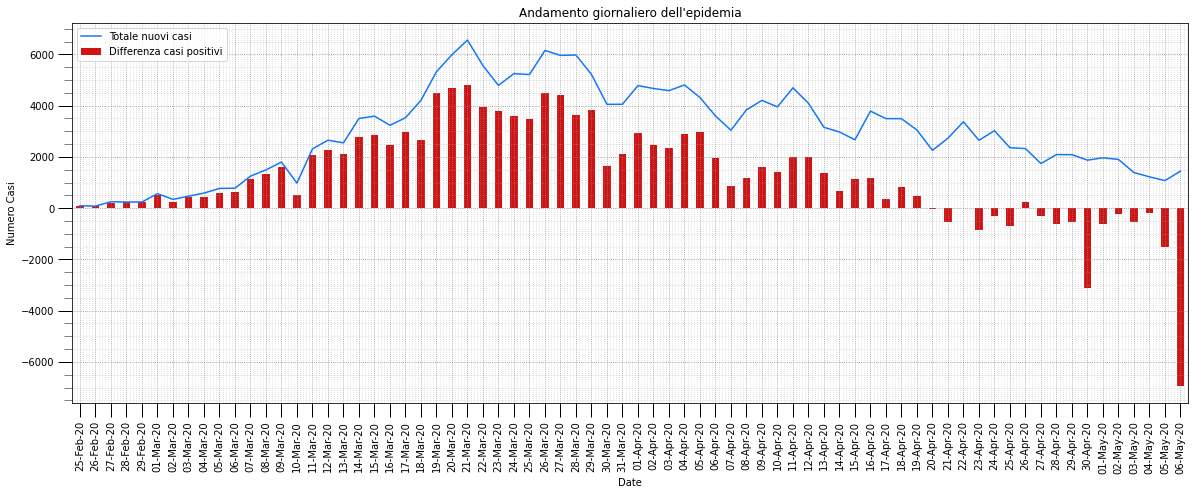

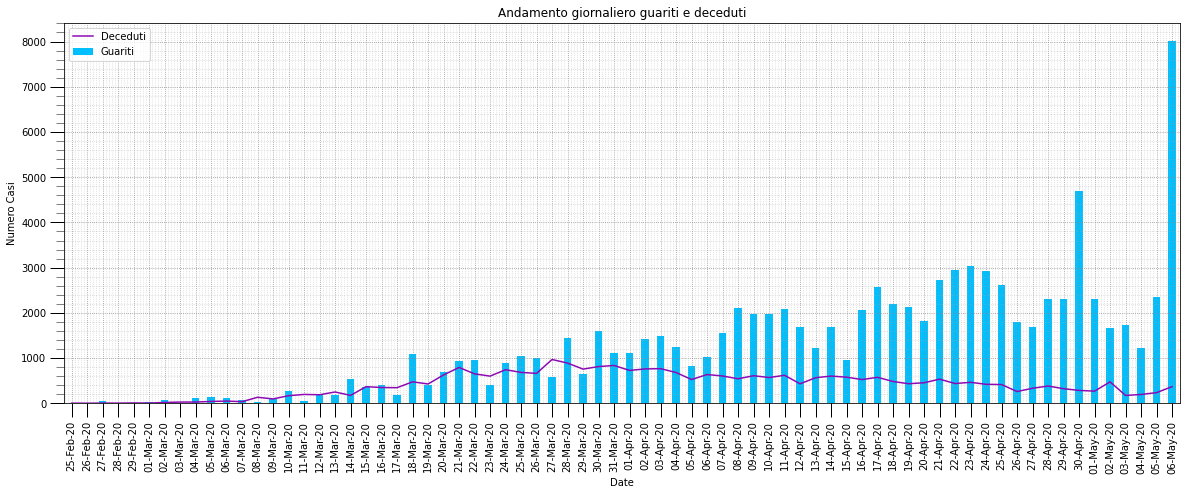

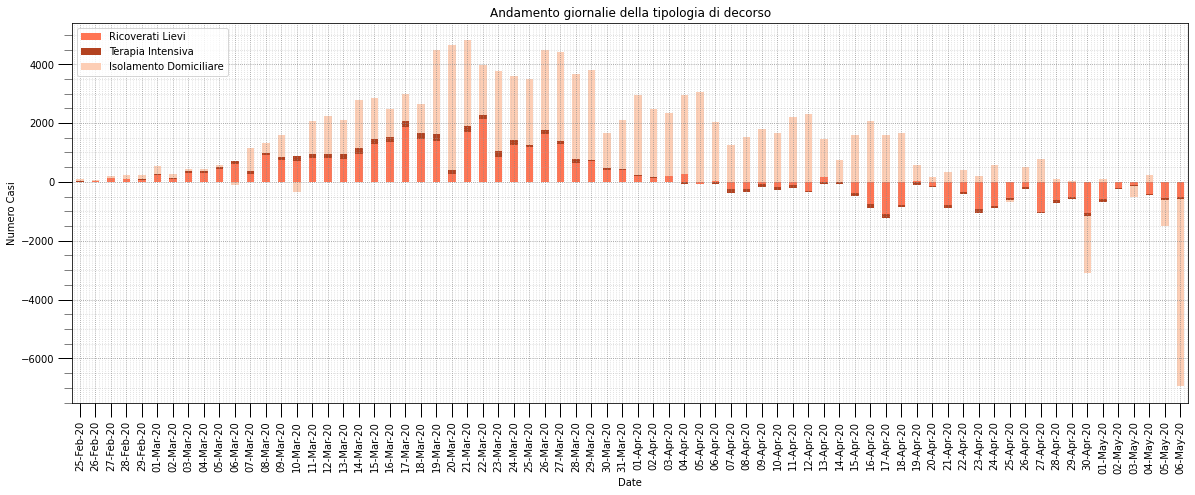

In [128]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)


plot =['nuovi_attualmente_positivi']
legends = ["Differenza casi positivi"]
colors = [COL_DIFF_POSITIVI, COL_GUARITI, COL_DECEDUTI]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends,  ax=ax)
beautify_graph(ay)



plot =['deceduti']
legends = ["Deceduti"]
colors = [COL_DECEDUTI]
ax = incremental_data.plot(kind='line', x='data', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
beautify_graph(ax)

plot =['dimessi_guariti']
legends = ["Guariti"]
colors = [COL_GUARITI, ]
ay = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=legends, ax=ax)
ay.set_title("Andamento giornaliero guariti e deceduti")
beautify_graph(ay)

#legends = ["Totale ospedalizzati"]
#colors = [COL_TOT_RICOVERATI]
#aw = incremental_data.plot(kind='line', x='data', y=['totale_ospedalizzati'], color=[COL_TOT_RICOVERATI], rot=90, label=legends)

plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', x='data', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Andamento giornalie della tipologia di decorso")
az.set_ylabel('Numero Casi')
beautify_graph(az)



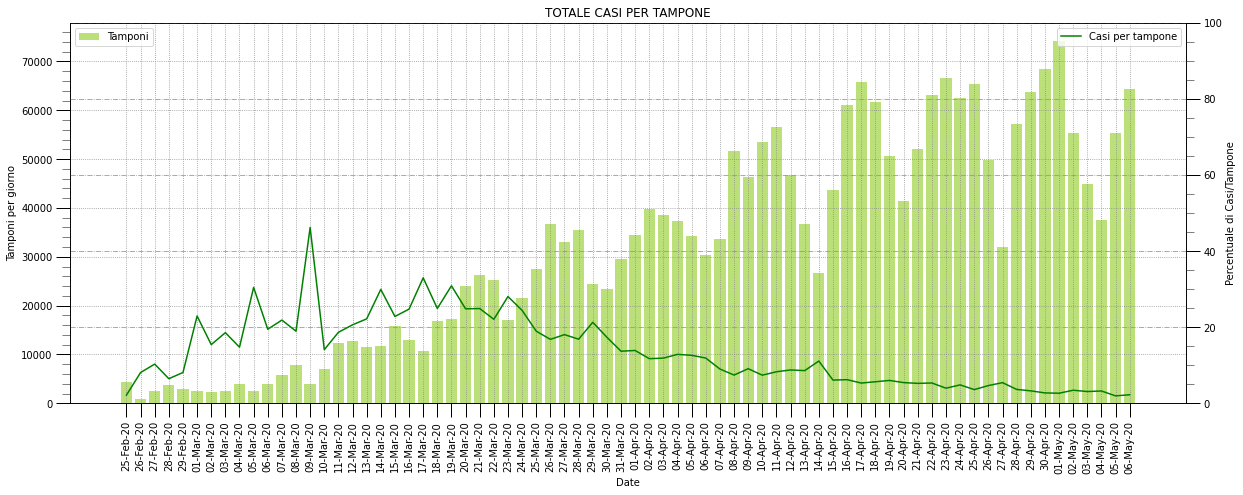

In [129]:


fig,ax = plt.subplots()

ax.bar(incremental_data['data'], tamponi, label='Tamponi', color=COL_TAMPONI)
ax.legend(loc="upper left")
ax.set_xlabel('Date')
ax.grid(b=True, which='major', color='#888888', linestyle=':')
ax.minorticks_on()
ax.tick_params(which='both', width=1)
ax.tick_params(which='major', length=14)
ax.tick_params(axis="x", which='minor', length=0, color='gray')
ax.tick_params(axis="y", which='minor', length=8, color='gray')
ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Tamponi per giorno')

ax2 = ax.twinx()

ax2.plot(incremental_data['CASI PER TAMPONE (%)'], label='Casi per tampone', color=COL_AVG)
ax2.set_ylim(0,100)
ax2.set_title("TOTALE CASI PER TAMPONE")
ax2.set_ylabel('Percentuale di Casi/Tampone')


ax2.legend(loc="upper right")
ax2.set_xlabel('Date')
ax2.grid(b=True, which='major', color='#7eaa70', linestyle='dashdot')
ax2.minorticks_on()
ax2.tick_params(which='both', width=1)
ax2.tick_params(which='major', length=14)
ax2.tick_params(axis="y", which='minor', length=8, color='gray')
ax2


#### I dati incrementali degli ultimi 10 giorni

In [130]:

show_table(incremental_data.rename(columns=NAME_LABELS),10).drop('TOT. POSITIVI', axis=1)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                         
27-Apr-20         1739            -290     1696       333        -1072   
28-Apr-20         2091            -608     2317       382         -723   
29-Apr-20         2086            -548     2311       323         -581   
30-Apr-20         1872           -3106     4693       285        -1162   
01-May-20         1965            -608     2304       269         -696   
02-May-20         1900            -239     1665       474         -251   
03-May-20         1389            -525     1740       174         -153   
04-May-20         1221            -199     1225       195         -441   
05-May-20         1075           -1513     2352       236         -605   
06-May-20         1444           -6939     8014       369         -595   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  \
                                                              
27-Apr-20       -1019           -53            782    32003   
28-Apr-20        -630           -93            115    57272   
29-Apr-20        -513           -68             33    63827   
30-Apr-20       -1061          -101          -1944    68456   
01-May-20        -580          -116             88    74208   
02-May-20        -212           -39             12    55412   
03-May-20        -115           -38           -372    44935   
04-May-20        -419           -22            242    37631   
05-May-20        -553           -52           -908    55263   
06-May-20        -501           -94          -6344    64263   

           CASI PER TAMPONE (%)  
                                 
27-Apr-20                  5.43  
28-Apr-20                  3.65  
29-Apr-20                  3.27  
30-Apr-20                  2.73  
01-May-20                  2.65  
02-May-20                  3.43  
03-May-20                  3.09  
04-May-20                  3.24  
05-May-20                  1.95  
06-May-20                  2.25

#### I dati cumulati degli ultimi 10 giorni

In [131]:
show_table(national_trend.rename(columns = NAME_LABELS),10).drop('DIFF. POSITIVI', axis=1)

CASI TOTALI  TOT. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
                                                                        
27-Apr-20       199414         105813    66624     26977        22309   
28-Apr-20       201505         105205    68941     27359        21586   
29-Apr-20       203591         104657    71252     27682        21005   
30-Apr-20       205463         101551    75945     27967        19843   
01-May-20       207428         100943    78249     28236        19147   
02-May-20       209328         100704    79914     28710        18896   
03-May-20       210717         100179    81654     28884        18743   
04-May-20       211938          99980    82879     29079        18302   
05-May-20       213013          98467    85231     29315        17697   
06-May-20       214457          91528    93245     29684        17102   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                             
27-Apr-20       20353          1956          83504  1789662  
28-Apr-20       19723          1863          83619  1846934  
29-Apr-20       19210          1795          83652  1910761  
30-Apr-20       18149          1694          81708  1979217  
01-May-20       17569          1578          81796  2053425  
02-May-20       17357          1539          81808  2108837  
03-May-20       17242          1501          81436  2153772  
04-May-20       16823          1479          81678  2191403  
05-May-20       16270          1427          80770  2246666  
06-May-20       15769          1333          74426  2310929

### Andamento Nazionale
I dati cumulati nei giorni. Ci da idea di come sta evolvendo l'epidemia.

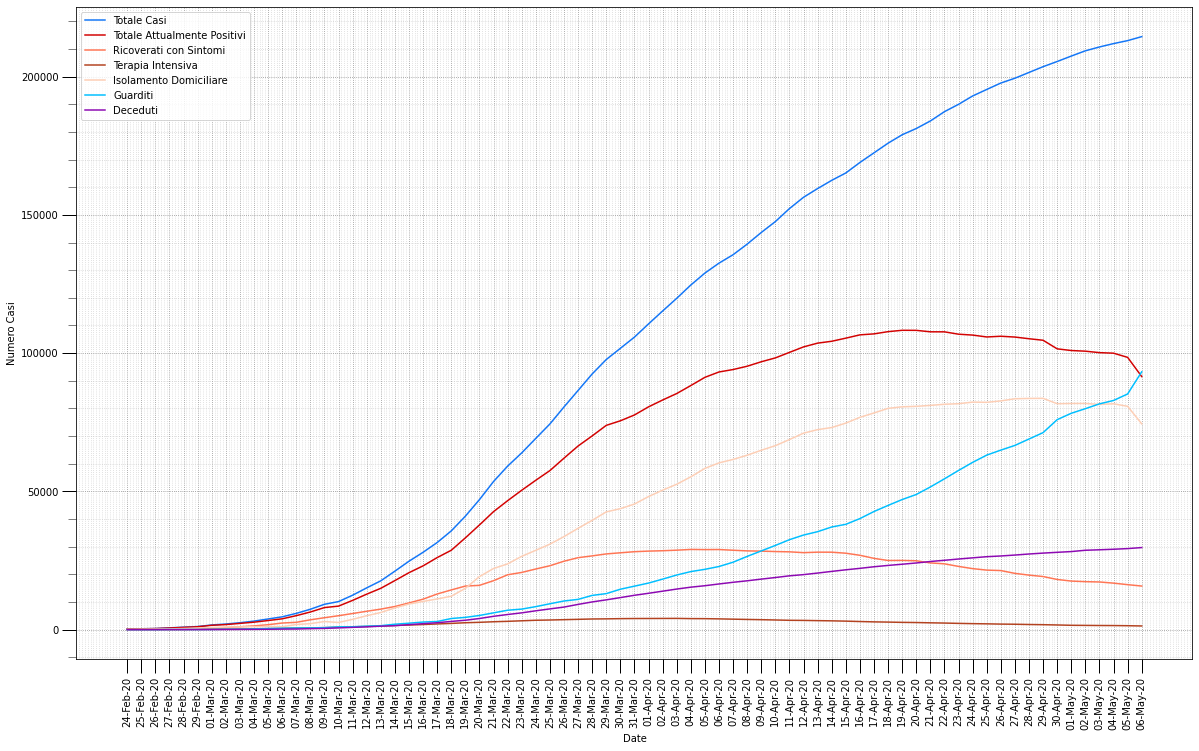

In [194]:
plt.rcParams['figure.figsize'] = [20, 12]
fig, ax = plt.subplots()

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)

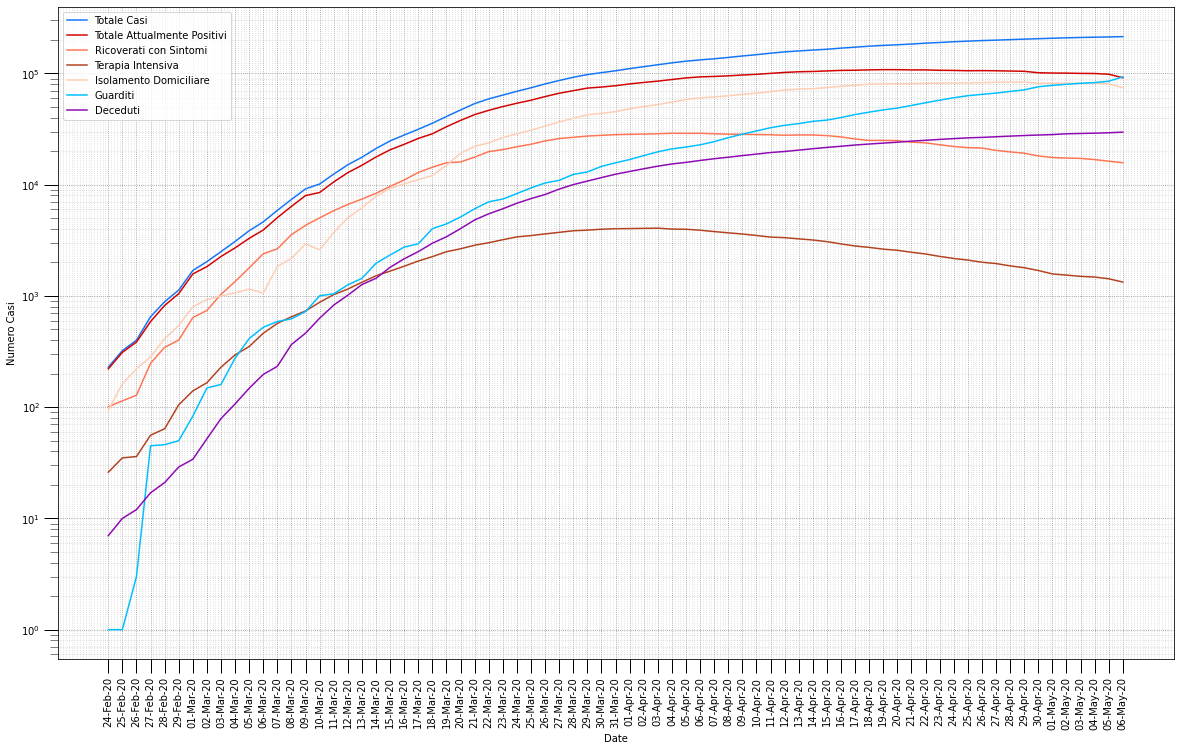

In [195]:

fig, ax = plt.subplots()
plt.yscale('log')
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i in range(0,len(plot)):
    plt.plot(national_trend['data'], national_trend[plot[i]], color=colors[i], label=legends[i])

ax.set_xticklabels(national_trend['data'], rotation=90)
ax.set_ylabel('Numero Casi')

beautify_graph(ax)


### Percentuale di crescita
Le percentuali di crescita sono valori che danno idea rispetto al giorno precedente di come si muove l'epidemia.
Questi valori a causa del numero molto elevato di contagi è normale che scendano.

In [196]:
plt.rcParams['figure.figsize'] = [20, 7]
growth_rates = pd.DataFrame()
growth_rates['data'] = national_trend['data']
growth_rates_columns = ['totale_casi','nuovi_attualmente_positivi', 'totale_attualmente_positivi', 'dimessi_guariti', 'deceduti', 'totale_ospedalizzati', 'ricoverati_con_sintomi', 'terapia_intensiva', 'isolamento_domiciliare',  'tamponi']

for c in growth_rates_columns:
    growth_rates[c] = (national_trend[c] - national_trend[c].shift(1))/abs(national_trend[c].shift(1))*100
growth_rates= growth_rates.round(2)
growth_rates=growth_rates[1:]

In [135]:
show_table(growth_rates.rename(columns=NAME_LABELS),7)

CASI TOTALI  DIFF. POSITIVI  TOT. POSITIVI  GUARITI  DECEDUTI  \
                                                                           
30-Apr-20         0.92         -466.79          -2.97     6.59      1.03   
01-May-20         0.96           80.42          -0.60     3.03      0.96   
02-May-20         0.92           60.69          -0.24     2.13      1.68   
03-May-20         0.66         -119.67          -0.52     2.18      0.61   
04-May-20         0.58           62.10          -0.20     1.50      0.68   
05-May-20         0.51         -660.30          -1.51     2.84      0.81   
06-May-20         0.68         -358.63          -7.05     9.40      1.26   

           TOT. RICOV.  RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
                                                                          
30-Apr-20        -5.53       -5.52         -5.63          -2.32     3.58  
01-May-20        -3.51       -3.20         -6.85           0.11     3.75  
02-May-20        -1.31       -1.21         -2.47           0.01     2.70  
03-May-20        -0.81       -0.66         -2.47          -0.45     2.13  
04-May-20        -2.35       -2.43         -1.47           0.30     1.75  
05-May-20        -3.31       -3.29         -3.52          -1.11     2.52  
06-May-20        -3.36       -3.08         -6.59          -7.85     2.86

### Trends e medie
Uno spaccato di alcuni dati.
Viene visualizzato anche il trend medio settimanale.
GR = Growth Rate - Fattore di crescita

In [136]:
avg_trend = pd.DataFrame()
avg_trend['data'] = national_trend['data']

avg_trend['totale_casi'] = national_trend['totale_casi']
avg_trend['totale_casi_percent'] = growth_rates['totale_casi']
avg_trend['avg_totale'] = growth_rates['totale_casi'].rolling(7).mean().round(2)

avg_trend['attualmente_positivi'] = national_trend['totale_attualmente_positivi']
avg_trend['attualmente_positivi_percent'] = (avg_trend['attualmente_positivi'] - avg_trend['attualmente_positivi'].shift(1))/abs(avg_trend['attualmente_positivi']).shift(1)*100
avg_trend['attualmente_positivi_percent']= avg_trend['attualmente_positivi_percent'].round(2)
avg_trend['avg_att_positivi'] = avg_trend['attualmente_positivi_percent'].rolling(7).mean().round(2)

avg_trend['dimessi_guariti'] = national_trend['dimessi_guariti']
avg_trend['dimessi_guariti_percent'] = growth_rates['dimessi_guariti']
avg_trend['avg_dimessi_guariti'] = growth_rates['dimessi_guariti'].rolling(7).mean().round(2)

avg_trend['deceduti'] = incremental_data['deceduti']
avg_trend['deceduti_percent'] = growth_rates['deceduti']
avg_trend['avg_deceduti'] = growth_rates['deceduti'].rolling(7).mean().round(2)

avg_trend['tamponi'] = incremental_data['tamponi']
avg_trend['tamponi_percent'] = growth_rates['tamponi']
avg_trend['avg_tamponi'] = growth_rates['tamponi'].rolling(7).mean().round(2)

* **CASI TOTALI GR**: Quando questo numero sarà zero, l'epidemia si sarà fermata e dovremmo aspettare che tutti siano guariti (Sperando che nessuno infetti altri).
* **NUOVI CASI TOTALI GR**: Quando questo numero sarà zero, non ci saranno più nuovi contagi e dovremo solo aspettare che tutti guardiscano
* **GUARITI GR**: Quanto indica quanti guariti rispetto al giorno prima ci sono. Più è alto, più guarisce velocemente. 
* **DECEDUTI**: Questo numero indica di quanto aumentano i morti rispetto al giorno prima. 

In [137]:
LABELS = {
    'nuovi_attualmente_positivi_casi': 'NUOVI CASI', 'nuovi_attualmente_positivi_percent': 'GR(%)', 'avg_nuovi': 'MEDIA 7GG (%)',
    'attualmente_positivi': 'TOT. ATTUALMENT. POS.',
    'attualmente_positivi_percent': 'GR(%)', 'avg_att_positivi': 'MEDIA 7GG (%)',
    'tamponi_percent': 'GR(%)', 'avg_tamponi': 'MEDIA 7GG (%)',
    'deceduti_percent': 'GR(%)', 'avg_deceduti':'MEDIA 7GG (%)',
    'totale_casi_percent': 'GR(%)', 'avg_totale':'MEDIA 7GG (%)',
    'dimessi_guariti_percent':'GR(%)', 'avg_dimessi_guariti':'MEDIA 7GG (%)',
}
show_table(avg_trend,5).rename(columns=LABELS)

CASI TOTALI  GR(%)  MEDIA 7GG (%)  TOT. ATTUALMENT. POS.  GR(%)  \
                                                                             
02-May-20       209328   0.92           0.99                 100704  -0.24   
03-May-20       210717   0.66           0.92                 100179  -0.52   
04-May-20       211938   0.58           0.88                  99980  -0.20   
05-May-20       213013   0.51           0.80                  98467  -1.51   
06-May-20       214457   0.68           0.75                  91528  -7.05   

           MEDIA 7GG (%)  GUARITI  GR(%)  MEDIA 7GG (%)  DECEDUTI  GR(%)  \
                                                                           
02-May-20          -0.70    79914   2.13           3.44       474   1.68   
03-May-20          -0.81    81654   2.18           3.34       174   0.61   
04-May-20          -0.80    82879   1.50           3.18       195   0.68   
05-May-20          -0.94    85231   2.84           3.09       236   0.81   
06-May-20          -1.87    93245   9.40           3.95       369   1.26   

           MEDIA 7GG (%)  TAMPONI  GR(%)  MEDIA 7GG (%)  
                                                         
02-May-20           1.22    55412   2.70           3.06  
03-May-20           1.16    44935   2.13           2.95  
04-May-20           1.08    37631   1.75           2.94  
05-May-20           0.99    55263   2.52           2.84  
06-May-20           1.00    64263   2.86           2.76

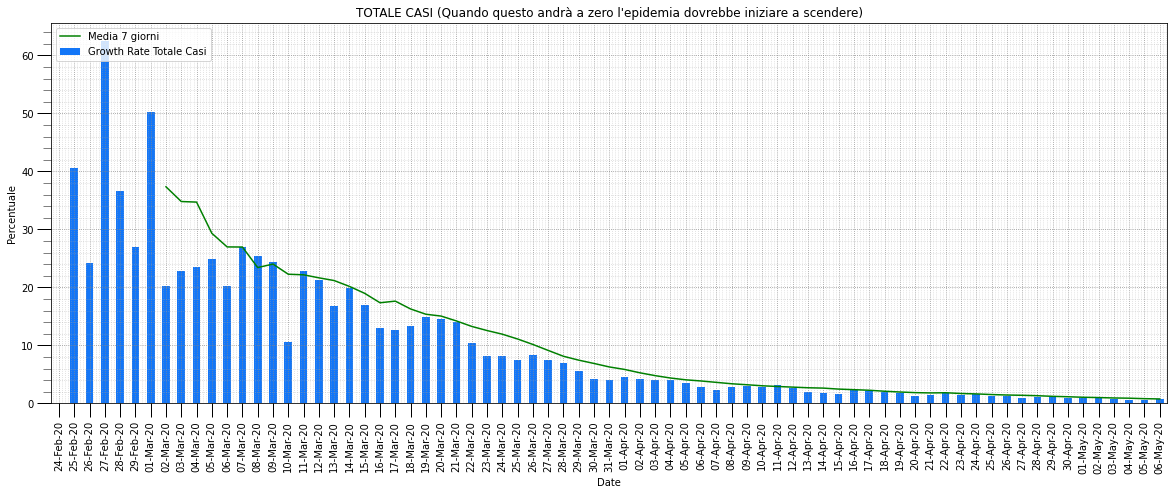

In [138]:
fig, ax = plt.subplots()
ay = avg_trend.plot(kind='line', x='data', y=['avg_totale'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind='bar', x='data', y=['totale_casi_percent'], color=[COL_TOTALE_CASI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("TOTALE CASI (Quando questo andrà a zero l'epidemia dovrebbe iniziare a scendere)")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

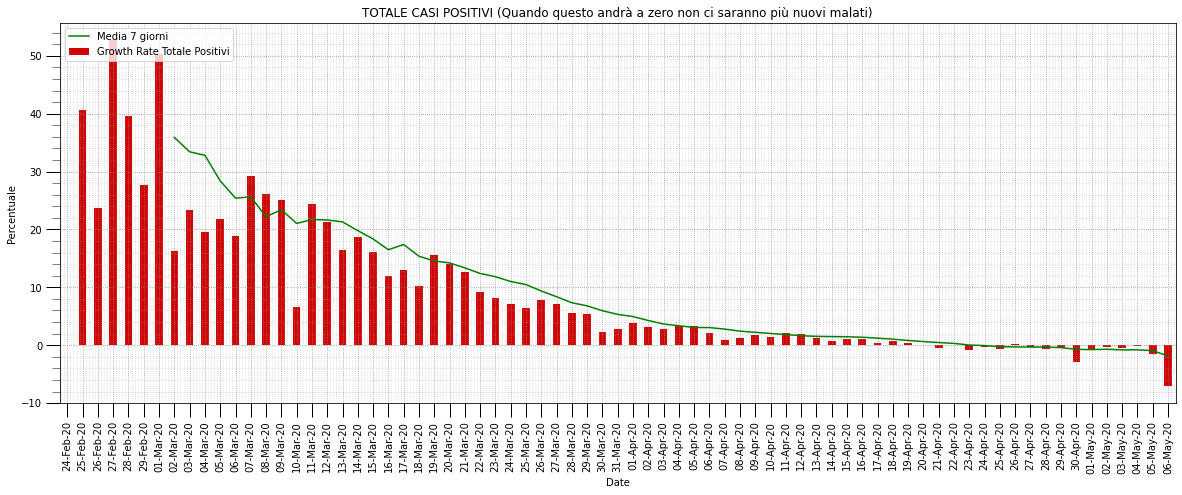

In [139]:
fig, ax = plt.subplots()

#ax.bar(x, series+fill, color=[COL_ATTUALMENTE_POSITIVI], label='Growth Rate Totale Positivi')
ay = avg_trend.plot(kind='line', x='data', y=['avg_att_positivi'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
#plt.plot(inter[0], inter[1], color='tomato', label='Predizione') 
avg_trend.plot(kind="bar", x='data', y=['attualmente_positivi_percent'], color=[COL_ATTUALMENTE_POSITIVI], label=['Growth Rate Totale Positivi'], ax=ay)

ax.set_title("TOTALE CASI POSITIVI (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Percentuale')

beautify_graph(ax)


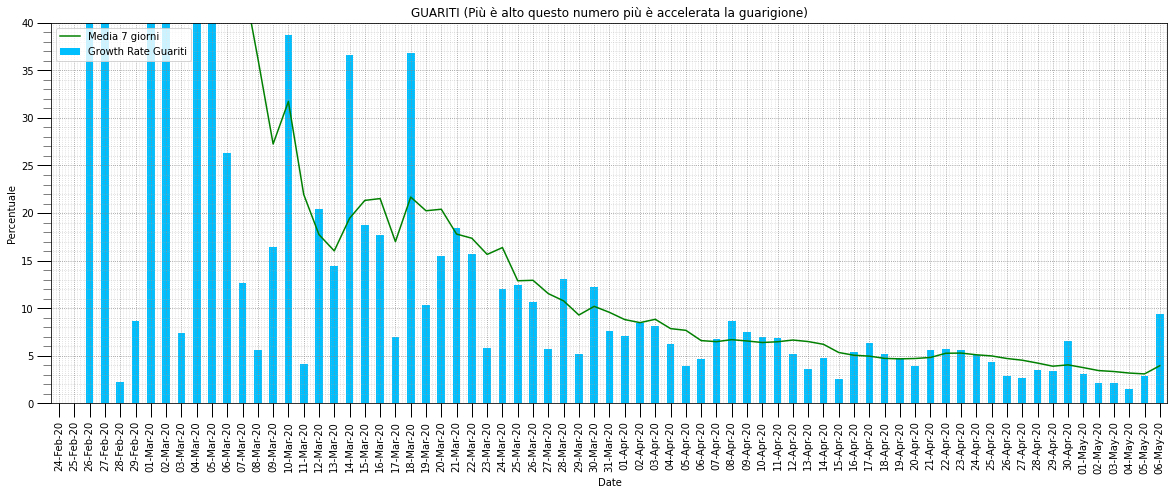

In [140]:
fig, ax = plt.subplots()
plot = ['dimessi_guariti_percent']

labels = ['Growth Rate Guariti']
ay = avg_trend.plot(kind='bar', x='data', y=plot, color=[COL_GUARITI], rot=90, label=labels, ax=ax)

plot = ['avg_dimessi_guariti']
labels = ['Media 7 giorni']
ay = avg_trend.plot(kind='line', x='data', y=plot, color=[COL_AVG], rot=90, label=labels, ax=ax)

ax.set_title("GUARITI (Più è alto questo numero più è accelerata la guarigione)")
ax.set_ylabel('Percentuale')
ax.set_ylim(0,40)
beautify_graph(ax)

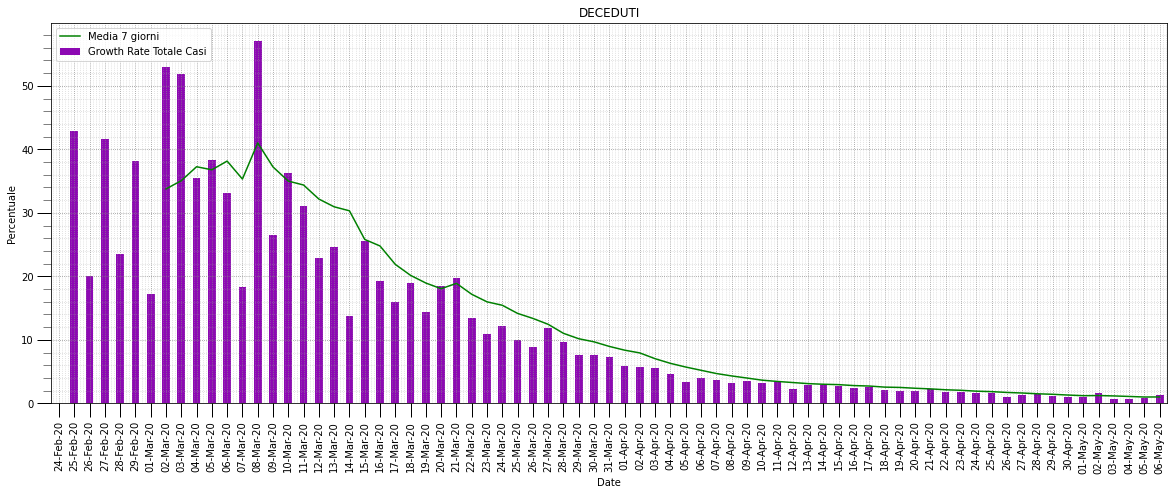

In [141]:
fig, ax = plt.subplots()

ay = avg_trend.plot(kind='line', x='data', y=['avg_deceduti'], color=[COL_AVG], rot=90, label=['Media 7 giorni'], ax=ax)
avg_trend.plot(kind='bar', x='data', y=['deceduti_percent'], color=[COL_DECEDUTI], label=['Growth Rate Totale Casi'], ax=ay)

ax.set_title("DECEDUTI")
ax.set_ylabel('Percentuale')
beautify_graph(ax)

## Velocità epidemia (Growth Factor)

Calcolo della derivata. La derivata ci dà l'idea della velocità e della direzione della curva epidemica. Se il valore è uguale a 1 la crescita è lineare (ogni giorno cresce dello stesso numero di persone è come andare a una velocità fissa di 50KM orari). Un fattore maggiore di 1 indica che la crescita aumenta la sua velocità (l'epidemia schiaccia sull'acceleratore), un valore inferiore a 1 indica l'epidemia rallenta la sua velocità (l'epidemaia ha schiacciato il freno). Una fattore uguale a zero significa che è stabile. 

In [142]:
max_tamponi = incremental_data['tamponi'].max()


In [192]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['totale_casi'] = national_trend['totale_casi']
gf['diff'] = gf['totale_casi'] - gf['totale_casi'].shift(1)
gf['gr'] = ((gf['diff'] / abs(gf['diff'].shift(1)))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf_15'] = gf['gr'].rolling(15).mean().round(3)


gf['tamponi'] =national_trend['tamponi']
gf['diff_tamp'] =national_trend['tamponi']-national_trend['tamponi'].shift(1)
gf['totale_casi'].shift(1) * max_tamponi /(national_trend['tamponi'].shift(1) -national_trend['tamponi'].shift(2))
gf['gr_tamp'] = ((gf['diff_tamp'] / abs(gf['diff_tamp'].shift(1)))).round(3)
gf['avg_gf_tamp'] = gf['gr_tamp'].rolling(7).mean().round(3)
gf['avg_gf_tamp_15'] = gf['gr_tamp'].rolling(15).mean().round(3)

gf['totale_attualmente_positivi'] = national_trend['totale_attualmente_positivi']
gf['diff_att_pos'] = gf['totale_attualmente_positivi'] - gf['totale_attualmente_positivi'].shift(1)

gf['gr_att_pos'] = ((gf['diff_att_pos'] / abs(gf['diff_att_pos'].shift(1)))).round(3)
gf['avg_att_pos'] = gf['gr_att_pos'].rolling(7).mean().round(3)
gf['avg_att_pos_15'] = gf['gr_att_pos'].rolling(15).mean().round(3)


show_table(gf, 7)\
    .drop('diff', axis=1)\
    .drop('diff_tamp', axis=1)\
    .rename(columns=
       {'gr': 'GROWTH FACTOR NUOVI', 
        'avg_gf': 'MEDIA 7GG',
        'avg_gf_3': 'MEDIA 3GG',
        'avg_gf_15': 'MEDIA 15GG',
        'gr_att_pos': 'GROWTH FACTOR ATT. POS.',
        'avg_att_pos_3': 'MEDIA 3GG',
        'avg_att_pos': 'MEDIA 7GG',
        'avg_att_pos_15': 'MEDIA 15GG',
        'gr_tamp': 'GROWTH FACTOR TAMPONI',
        'avg_gf_tamp_15': 'MEDIA 15GG',
        'avg_gf_tamp': 'MEDIA 7GG'
       })


CASI TOTALI  GROWTH FACTOR NUOVI  MEDIA 7GG  MEDIA 15GG  TAMPONI  \
                                                                              
30-Apr-20       205463                0.897      0.965       0.996  1979217   
01-May-20       207428                1.050      0.952       0.971  2053425   
02-May-20       209328                0.967      0.978       0.974  2108837   
03-May-20       210717                0.731      0.942       0.956  2153772   
04-May-20       211938                0.879      0.961       0.957  2191403   
05-May-20       213013                0.880      0.915       0.966  2246666   
06-May-20       214457                1.343      0.964       0.975  2310929   

           GROWTH FACTOR TAMPONI  MEDIA 7GG  MEDIA 15GG  TOT. POSITIVI  \
                                                                         
30-Apr-20                  1.073      1.052       1.063         101551   
01-May-20                  1.084      1.073       1.042         100943   
02-May-20                  0.747      1.030       1.020         100704   
03-May-20                  0.811      1.037       1.011         100179   
04-May-20                  0.837      1.065       1.012          99980   
05-May-20                  1.469      1.019       1.056          98467   
06-May-20                  1.163      1.026       1.050          91528   

           diff_att_pos  GROWTH FACTOR ATT. POS.  MEDIA 7GG  MEDIA 15GG  
                                                                         
30-Apr-20       -3106.0                   -5.668     -1.703      -7.950  
01-May-20        -608.0                   -0.196     -1.677      -8.033  
02-May-20        -239.0                   -0.393     -1.430      -8.079  
03-May-20        -525.0                   -2.197     -1.798      -8.378  
04-May-20        -199.0                   -0.379     -1.690      -8.443  
05-May-20       -1513.0                   -7.603     -2.477      -8.947  
06-May-20       -6939.0                   -4.586     -3.003      -7.493

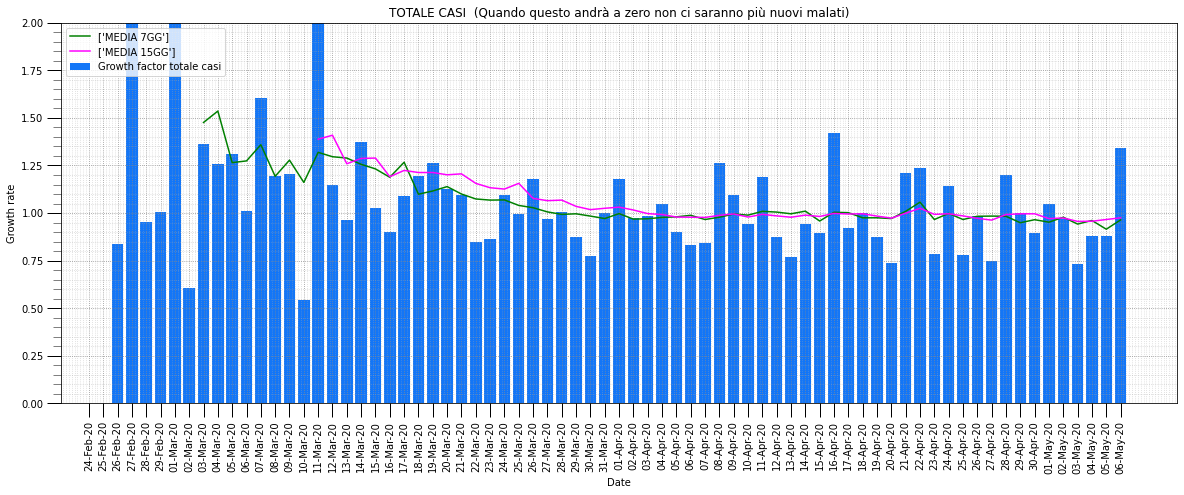

In [187]:
plt.rcParams['figure.figsize'] = [20, 7]
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor totale casi', color=COL_TOTALE_CASI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("TOTALE CASI  (Quando questo andrà a zero non ci saranno più nuovi malati)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


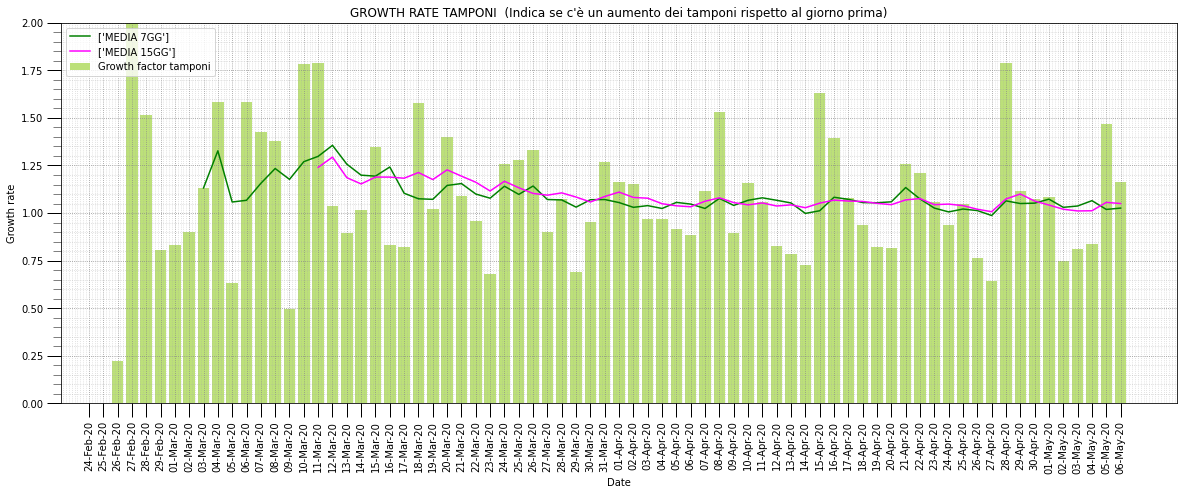

In [188]:
fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr_tamp'], label='Growth factor tamponi', color=COL_TAMPONI)
ax.plot(gf['data'], gf['avg_gf_tamp'], color=COL_AVG, label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf_tamp_15'], color='magenta', label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH RATE TAMPONI  (Indica se c'è un aumento dei tamponi rispetto al giorno prima)")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


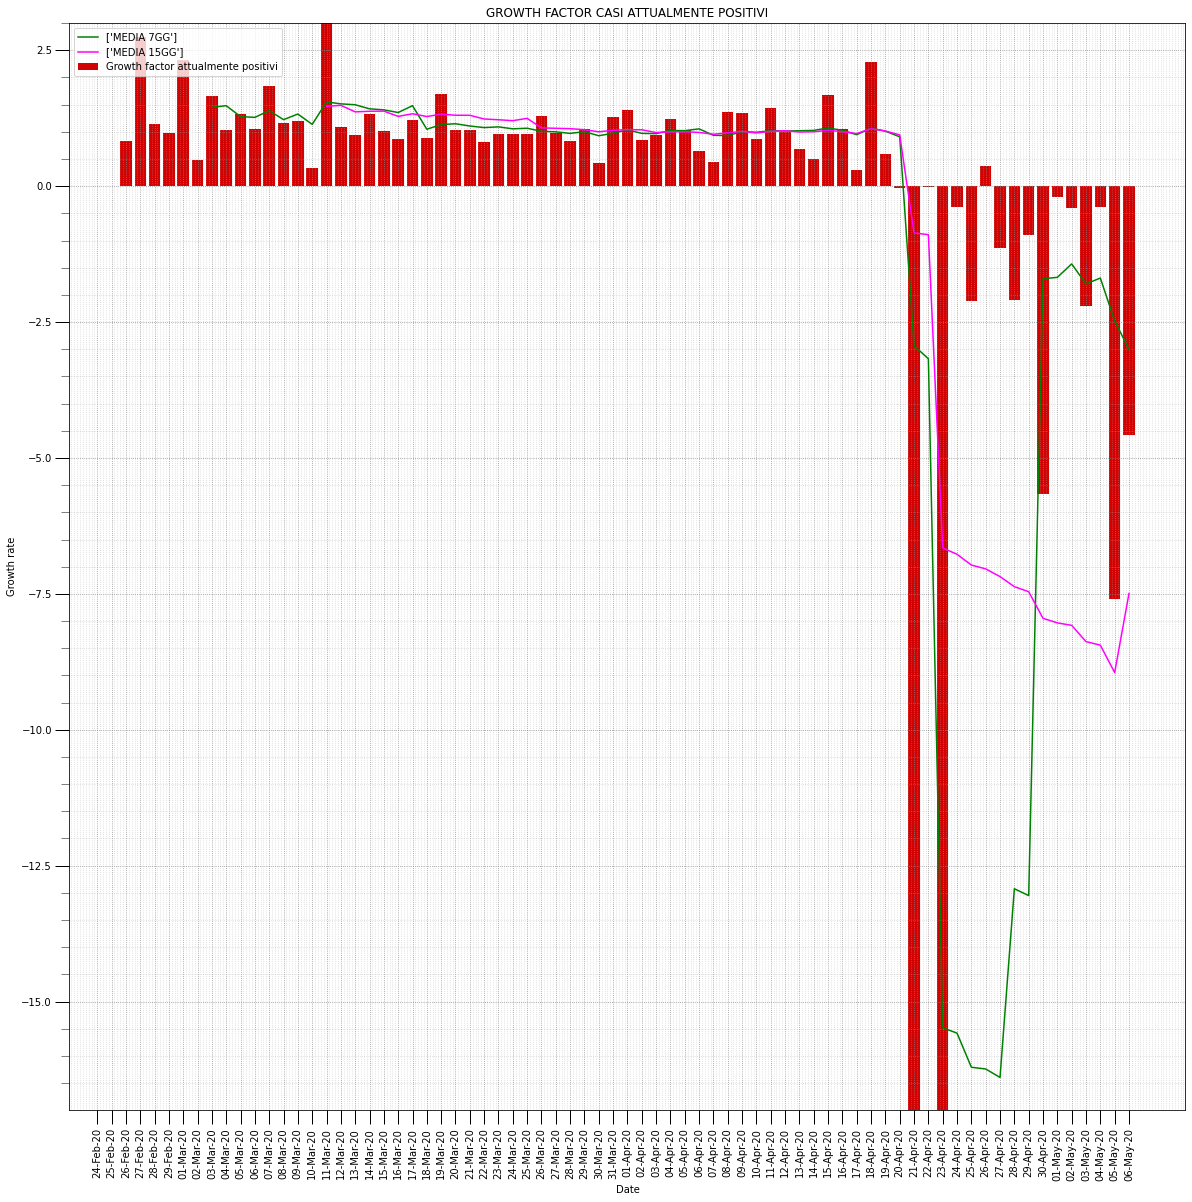

In [189]:
plt.rcParams['figure.figsize'] = [20, 20]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr_att_pos'], label='Growth factor attualmente positivi', color=COL_ATTUALMENTE_POSITIVI)
ax.plot(gf['data'], gf['avg_att_pos'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_att_pos_15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-17,3)
ax.set_title("GROWTH FACTOR CASI ATTUALMENTE POSITIVI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)

In [190]:
plt.rcParams['figure.figsize'] = [20, 7]

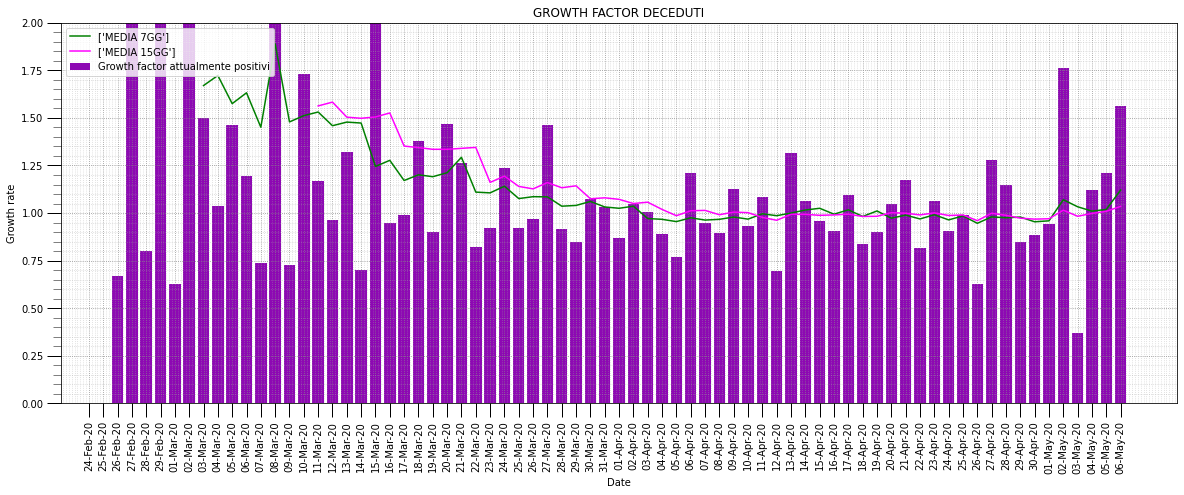

In [191]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['deceduti'] = national_trend['deceduti']
gf['diff'] = gf['deceduti'] - gf['deceduti'].shift(1)
gf['gr'] = (gf['diff'] / gf['diff'].shift(1)).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

fig, ax = plt.subplots()

ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_DECEDUTI)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(0,2)
ax.set_title("GROWTH FACTOR DECEDUTI")
ax.set_ylabel('Growth rate')
beautify_graph(ax)


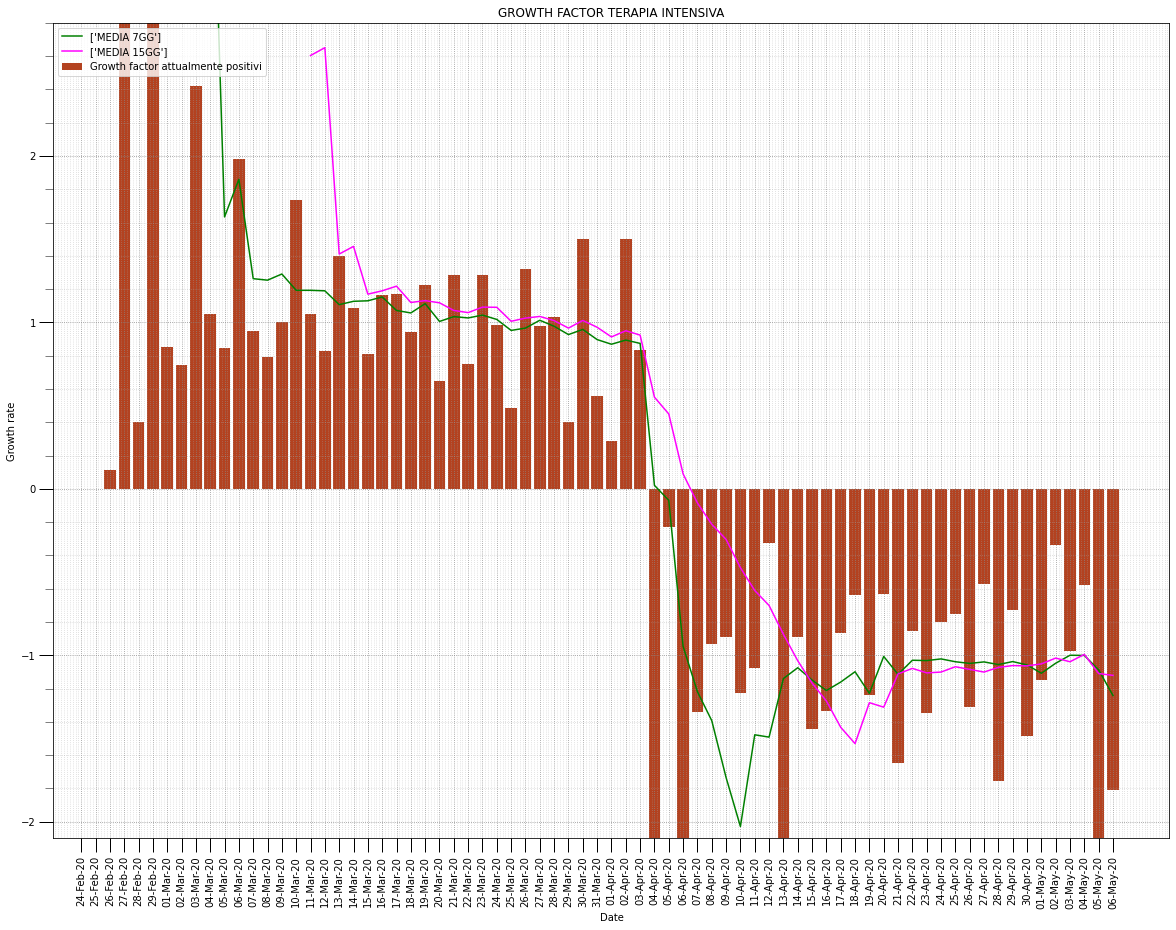

In [149]:
gf = pd.DataFrame()
gf['data'] = national_trend['data']
gf['terapia_intensiva'] = national_trend['terapia_intensiva']
gf['diff'] = gf['terapia_intensiva'] - gf['terapia_intensiva'].shift(1)
gf['gr'] = (gf['diff'] / abs(gf['diff'].shift(1))).round(3)
gf['avg_gf'] = gf['gr'].rolling(7).mean().round(3)
gf['avg_gf15'] = gf['gr'].rolling(15).mean().round(3)

plt.rcParams['figure.figsize'] = [20, 15]
fig, ax = plt.subplots()


ax.bar(gf['data'], gf['gr'], label='Growth factor attualmente positivi', color=COL_TERAPIA_INTENSIVA)
ax.plot(gf['data'], gf['avg_gf'], color=COL_AVG,label=['MEDIA 7GG'])
ax.plot(gf['data'], gf['avg_gf15'], color='magenta',label=['MEDIA 15GG'])
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_ylim(-2.1,2.8)
ax.set_title("GROWTH FACTOR TERAPIA INTENSIVA")
ax.set_ylabel('Growth rate')
beautify_graph(ax)
plt.rcParams['figure.figsize'] = [20, 7]

### Divisione percentuali dei casi
Un indicazione percentuale dei dati. La fotografia ad oggi (dall'inizio dell'epidemia italiana)

**Le percentuali giornaliere (dati giorno per giorno)**

In [150]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = incremental_data['data']
percents_in_period['ricoverati_con_sintomi'] = (incremental_data['ricoverati_con_sintomi'] / incremental_data['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (incremental_data['terapia_intensiva'] / incremental_data['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (incremental_data['isolamento_domiciliare'] / incremental_data['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (incremental_data['dimessi_guariti'] / incremental_data['totale_casi'])*100
percents_in_period['deceduti'] = (incremental_data['deceduti'] / incremental_data['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

In [151]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
30-Apr-20      -56.68           -5.40                 -103.85   250.69   
01-May-20      -29.52           -5.90                    4.48   117.25   
02-May-20      -11.16           -2.05                    0.63    87.63   
03-May-20       -8.28           -2.74                  -26.78   125.27   
04-May-20      -34.32           -1.80                   19.82   100.33   
05-May-20      -51.44           -4.84                  -84.47   218.79   
06-May-20      -34.70           -6.51                 -439.34   554.99   

           DECEDUTI  
                     
30-Apr-20     15.22  
01-May-20     13.69  
02-May-20     24.95  
03-May-20     12.53  
04-May-20     15.97  
05-May-20     21.95  
06-May-20     25.55

### Percentuali totali

In [152]:
percents_in_period.tail(10)

data  ricoverati_con_sintomi  terapia_intensiva  \
                                                                  
27-Apr-20  27-Apr-20                  -58.60              -3.05   
28-Apr-20  28-Apr-20                  -30.13              -4.45   
29-Apr-20  29-Apr-20                  -24.59              -3.26   
30-Apr-20  30-Apr-20                  -56.68              -5.40   
01-May-20  01-May-20                  -29.52              -5.90   
02-May-20  02-May-20                  -11.16              -2.05   
03-May-20  03-May-20                   -8.28              -2.74   
04-May-20  04-May-20                  -34.32              -1.80   
05-May-20  05-May-20                  -51.44              -4.84   
06-May-20  06-May-20                  -34.70              -6.51   

           isolamento_domiciliare  dimessi_guariti  deceduti  contagi  
                                                                       
27-Apr-20                   44.97            97.53     19.15  -213.28  
28-Apr-20                    5.50           110.81     18.27  -109.66  
29-Apr-20                    1.58           110.79     15.48     9.87  
30-Apr-20                 -103.85           250.69     15.22  -466.79  
01-May-20                    4.48           117.25     13.69    80.42  
02-May-20                    0.63            87.63     24.95    60.69  
03-May-20                  -26.78           125.27     12.53  -119.67  
04-May-20                   19.82           100.33     15.97    62.10  
05-May-20                  -84.47           218.79     21.95  -660.30  
06-May-20                 -439.34           554.99     25.55  -358.63

In [153]:
a="""plt.rcParams['figure.figsize'] = [20, 5]
fig, ax = plt.subplots()

plot = ['isolamento_domiciliare','dimessi_guariti','deceduti','ricoverati_con_sintomi','terapia_intensiva']
colors = [COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI,COL_RICOVERATI, COL_TERAPIA_INTENSIVA ]
labels = ['Isolamento Domiciliare','Guariti','Deceduti','Ricoverati con sintomi','Terapia Intensiva']

for i in range(len(plot)):
    plt.bar(percents_in_period['data'], percents_in_period[plot[i]], color=colors[i],label=labels[i])

ax.set_ylim(-20,100)
ax.set_xticklabels(gf['data'], rotation=90)
ax.set_title("PERCENTUALE GIORNALIERA")
ax.set_ylabel('Percentuale')
beautify_graph(ax)
"""

**Le percentuali dall'inizio dell'epidemia**

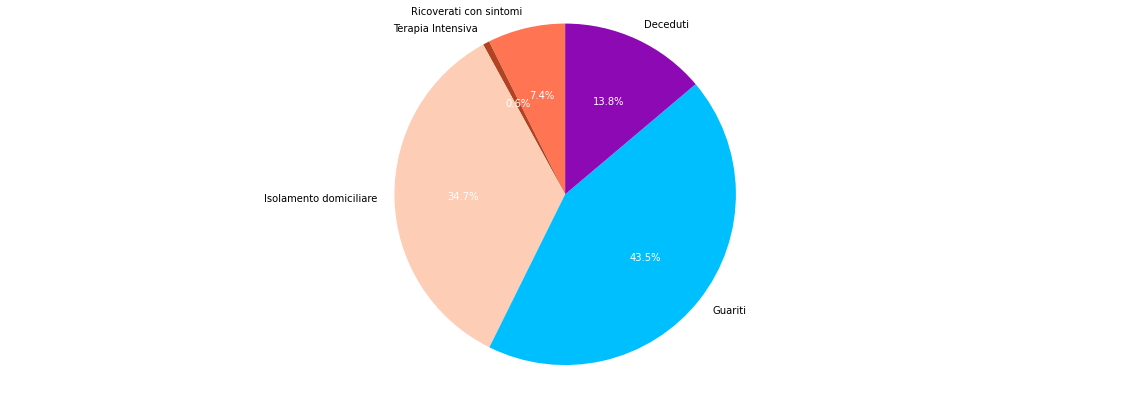

In [154]:
# Data to plot
last_info = national_trend[-1:]
v1 = int(last_info['ricoverati_con_sintomi'])
v2 = int(last_info['terapia_intensiva'])
v3 = int(last_info['isolamento_domiciliare'])
v4 = int(last_info['dimessi_guariti'])
v5 = int(last_info['deceduti'])
labels = 'Ricoverati con sintomi', 'Terapia Intensiva', 'Isolamento domiciliare', 'Guariti', 'Deceduti'
sizes = [v1, v2, v3, v4, v5]
fig1, ax1 = plt.subplots()
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
_, _, autotexts = ax1.pie(sizes,labels=labels,colors=colors, autopct='%1.1f%%',  startangle=90)

for autotext in autotexts:
    autotext.set_color('white')
    
ax1.axis('equal')

plt.show()


In [155]:
percents_in_period = pd.DataFrame()
percents_in_period['data'] = national_trend['data']
percents_in_period['ricoverati_con_sintomi'] = (national_trend['ricoverati_con_sintomi'] / national_trend['totale_casi'])*100
percents_in_period['terapia_intensiva'] = (national_trend['terapia_intensiva'] / national_trend['totale_casi'])*100
percents_in_period['isolamento_domiciliare'] = (national_trend['isolamento_domiciliare'] / national_trend['totale_casi'])*100
percents_in_period['dimessi_guariti'] = (national_trend['dimessi_guariti'] / national_trend['totale_casi'])*100
percents_in_period['deceduti'] = (national_trend['deceduti'] / national_trend['totale_casi'])*100
percents_in_period['contagi'] = growth_rates['nuovi_attualmente_positivi']
percents_in_period = percents_in_period[1:].round(2)

Lo spaccato giorno per giorno percentuale. Da qui si evidenzia come si evolve l'andamento percencentuale dell'epidemia. In basso (in verde) il grafico del Growth Rate di ogni giorno rispetto al giorno precedente. Per capire come si evolvono le percentuali in base all'aumento o la diminuzione dei nuovi casi.

In [156]:
percents_in_period.tail(7).drop('data', axis=1).drop('contagi', axis=1).rename(
    columns={
        'ricoverati_con_sintomi':'RICOVERATI',
        'terapia_intensiva':'TER. INTENSIVA',
        'isolamento_domiciliare':'ISOLAMENTO DOMICILIARE',
        'dimessi_guariti':'GUARITI',
        'deceduti':'DECEDUTI'
    }
)

RICOVERATI  TER. INTENSIVA  ISOLAMENTO DOMICILIARE  GUARITI  \
                                                                         
30-Apr-20        8.83            0.82                   39.77    36.96   
01-May-20        8.47            0.76                   39.43    37.72   
02-May-20        8.29            0.74                   39.08    38.18   
03-May-20        8.18            0.71                   38.65    38.75   
04-May-20        7.94            0.70                   38.54    39.11   
05-May-20        7.64            0.67                   37.92    40.01   
06-May-20        7.35            0.62                   34.70    43.48   

           DECEDUTI  
                     
30-Apr-20     13.61  
01-May-20     13.61  
02-May-20     13.72  
03-May-20     13.71  
04-May-20     13.72  
05-May-20     13.76  
06-May-20     13.84

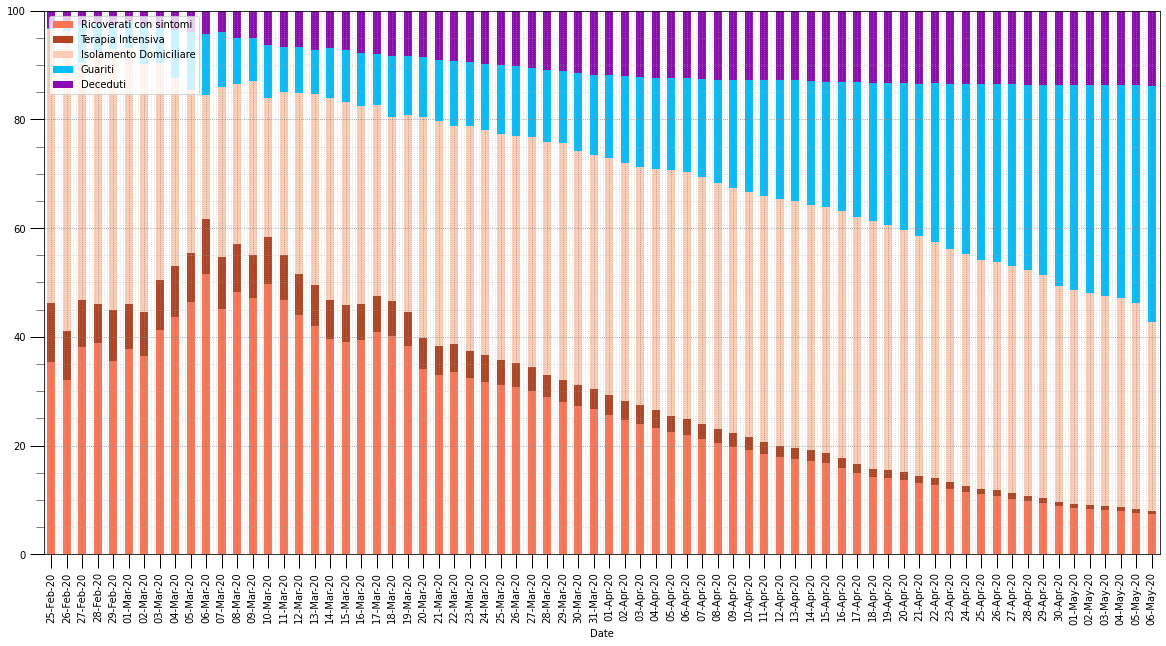

In [157]:
# %matplotlib notebook
plt.rcParams['figure.figsize'] = [20, 10]

plot = ['ricoverati_con_sintomi','terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
labels = ['Ricoverati con sintomi','Terapia Intensiva','Isolamento Domiciliare','Guariti','Deceduti']
ax = percents_in_period.plot(kind='bar', x='data', y=plot, color=colors, rot=90, label=labels, stacked=True)
ax.set_ylim(0,100)

beautify_graph(ax)


## DATI REGIONALI

In [158]:
regional_trend_read = pd.read_csv(os.path.join(REPO_DIR,'dati-regioni/dpc-covid19-ita-regioni.csv'))
regional_trend_read['totale_attualmente_positivi'] = regional_trend_read['totale_positivi']
regional_trend_read['nuovi_attualmente_positivi'] = regional_trend_read['variazione_totale_positivi']
regional_trend_read['DATA'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')
regional_trend_read['data'] = pd.to_datetime(regional_trend_read['data']).dt.strftime('%d-%b-%y')



In [159]:
#regional_trend.set_index(keys=['DATA'], append=False, inplace=True)
#regional_trend.index.rename('', inplace=True)


regions = regional_trend_read.denominazione_regione.unique()
regions_data = {}

for r in regions:
    data = regional_trend_read[regional_trend_read['denominazione_regione']==r]
    data.set_index(keys=['data'], append=False, inplace=True)
    regions_data[r]=data


In [160]:
#media_7_giorni =casi_tampone.rolling(7).mean().round(2)
region_colors = ['#505cf7','#e688b5','#e688b5','#791d9f','#17652e','#76f384',\
          '#bd3089','#5c4566','#3b6712','#bb90bf','#549bb5','#a674cc',\
          '#345a48','#dc9615','#51294a','#0446ca','#96bf9b','#c20cb2',\
          '#acc7fb','#ecdab7','#bbfc5f'
         ]


In [161]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti','nuovi_attualmente_positivi']

regional_datas = {x:pd.DataFrame() for x in plot}

for p in plot:
    for i,r in enumerate(regions):
        regional_datas[p][r]= regions_data[r][p]



### Totale Casi per Regione

In [162]:
regional_datas['totale_casi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
06-May-20     3047         399          2543      1122      4532   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
06-May-20           26379                   3094   6995     8551      79369

In [163]:
regional_datas['totale_casi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
06-May-20    6421     304     27939    4196      1319     3281     9657   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
06-May-20         4280    1404           1146   18479

### Nuovi Casi Per Regione

In [164]:
incremental_data_regional = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare', 'totale_attualmente_positivi','tamponi']

n = regional_datas['totale_casi']
for c in n.columns:
    incremental_data_regional[c] = n[c] - n[c].shift(1)
    incremental_data_regional[c] = incremental_data_regional[c].astype(pd.Int64Dtype())

incremental_data_regional = incremental_data_regional[1:]

In [165]:

incremental_data_regional.iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
30-Apr-20        7           1            11         6        13   
01-May-20       18          11            10         4        21   
02-May-20       16           2             7         0        15   
03-May-20       32           6             1         2        25   
04-May-20        4           0             5         4        14   
05-May-20       25          10             1         1        20   
06-May-20       22           3             1         3        14   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
30-Apr-20             259                     15     71      104        598  
01-May-20             208                     16     56      133        737  
02-May-20             206                     18     84      186        533  
03-May-20             166                     13     53       47        526  
04-May-20             159                      4     38       53        577  
05-May-20             100                      9     67       63        500  
06-May-20             104                      9     81       76        764

In [166]:

incremental_data_regional.iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
30-Apr-20      37       1       428      43         5       26       60   
01-May-20      28       2       395      27        18       28       93   
02-May-20      23       1       495      34         2       19       80   
03-May-20      21       0       251      11         4       27       38   
04-May-20      44       0       192       9        -2       15       38   
05-May-20      29       0       152      17         1       12       30   
06-May-20      29       3       165      26         1       14       26   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
30-Apr-20           47       1              4     135  
01-May-20           16       1              5     138  
02-May-20           49       1              3     126  
03-May-20           66       0              6      94  
04-May-20           11       0              1      55  
05-May-20            3       6              0      29  
06-May-20           19       4              3      77

### Totale Attualmente Positivi per Regione

In [167]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
06-May-20     1791         172           579       644      2340   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
06-May-20            8391                    962   4433     3306      31753

In [168]:
regional_datas['totale_attualmente_positivi'].iloc[-1:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
06-May-20    3236     179     14858    2903       623     2201     5088   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
06-May-20          982     171            127    6789

### Nuovi Positivi per Regione

In [169]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,0:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
30-Apr-20      -61          -2           -43       -13        -9   
01-May-20       -4           1           -45       -13       -20   
02-May-20      -32          -2           -54       -14       -32   
03-May-20      -11           3           -38       -11         5   
04-May-20      -31         -21           -29       -28       -15   
05-May-20      -28           4           -24       -24      -181   
06-May-20      -18          -5           -33        -6      -190   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
30-Apr-20           -2299                    -57    -67      -25         89  
01-May-20             -79                    -55    -22      -33        262  
02-May-20            -161                     -6      6       80        194  
03-May-20            -278                    -22    -67      -47        259  
04-May-20             -61                    -37      0      -43        381  
05-May-20            -303                    -66    -15      -81       -215  
06-May-20            -290                    -22     63     -121      -5339

In [170]:
regional_datas['nuovi_attualmente_positivi'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
30-Apr-20    -137      -3       -28      22       -17       12      -79   
01-May-20       1       0        69      -2         0       14     -211   
02-May-20      -6      -8       157       7       -14       15       -8   
03-May-20      -7      -1       -81       1       -41       17      -37   
04-May-20       8      -3       -76     -10       -36       -1      -49   
05-May-20      13      -1      -239      -6       -11        0      -89   
06-May-20      17       2      -465     -36       -19       -1     -102   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
30-Apr-20          -93     -28            -46    -222  
01-May-20          -77     -29              3    -368  
02-May-20          -11      -8              6    -348  
03-May-20          -35     -13             11    -132  
04-May-20          -82      -2              1     -65  
05-May-20         -124      -5              0    -118  
06-May-20          -59      -5             17    -327

### Terapia intensiva

In [171]:
regional_datas['terapia_intensiva'].iloc[-7:,:10]

Abruzzo  Basilicata  P.A. Bolzano  Calabria  Campania  \
data                                                               
30-Apr-20       16           4            13         6        29   
01-May-20       16           4            11         3        29   
02-May-20       16           4            10         4        27   
03-May-20       16           3            11         4        30   
04-May-20       15           3            10         4        24   
05-May-20       11           3            11         4        25   
06-May-20       11           3            11         3        25   

           Emilia-Romagna  Friuli Venezia Giulia  Lazio  Liguria  Lombardia  
data                                                                         
30-Apr-20             206                     11    115       69        605  
01-May-20             197                      6    105       68        563  
02-May-20             196                      5     96       68        545  
03-May-20             197                      6     95       68        532  
04-May-20             199                      4     95       72        532  
05-May-20             191                      4     91       68        509  
06-May-20             176                      3     91       59        480

In [172]:
regional_datas['terapia_intensiva'].iloc[-7:,10:]

Marche  Molise  Piemonte  Puglia  Sardegna  Sicilia  Toscana  \
data                                                                      
30-Apr-20      48       1       199      42        16       33      126   
01-May-20      44       1       181      39        12       30      124   
02-May-20      46       1       178      39        13       30      118   
03-May-20      43       1       169      40        10       29      112   
04-May-20      44       1       161      39         9       27      107   
05-May-20      42       1       155      39         9       26      111   
06-May-20      42       0       150      36        11       25       92   

           P.A. Trento  Umbria  Valle d'Aosta  Veneto  
data                                                   
30-Apr-20           21      16              4     114  
01-May-20           19      13              3     110  
02-May-20           19      13              3     108  
03-May-20           17      13              2     103  
04-May-20           17      13              2     101  
05-May-20           15      11              3      98  
06-May-20           13       9              3      90

## Andamento per regione

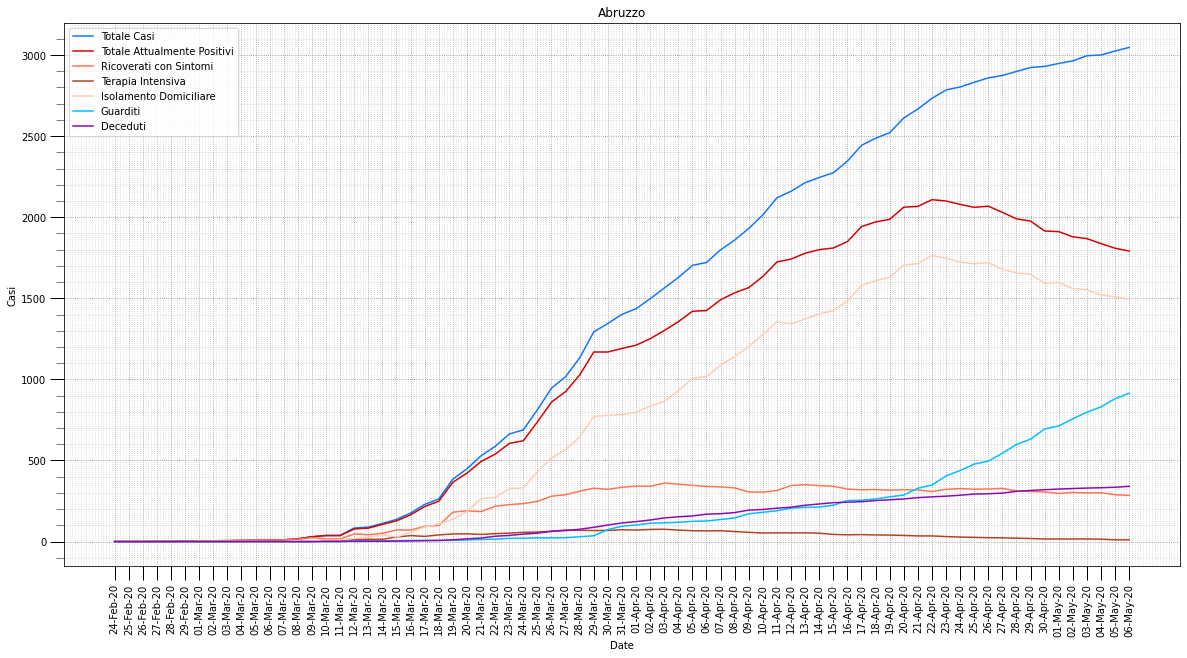

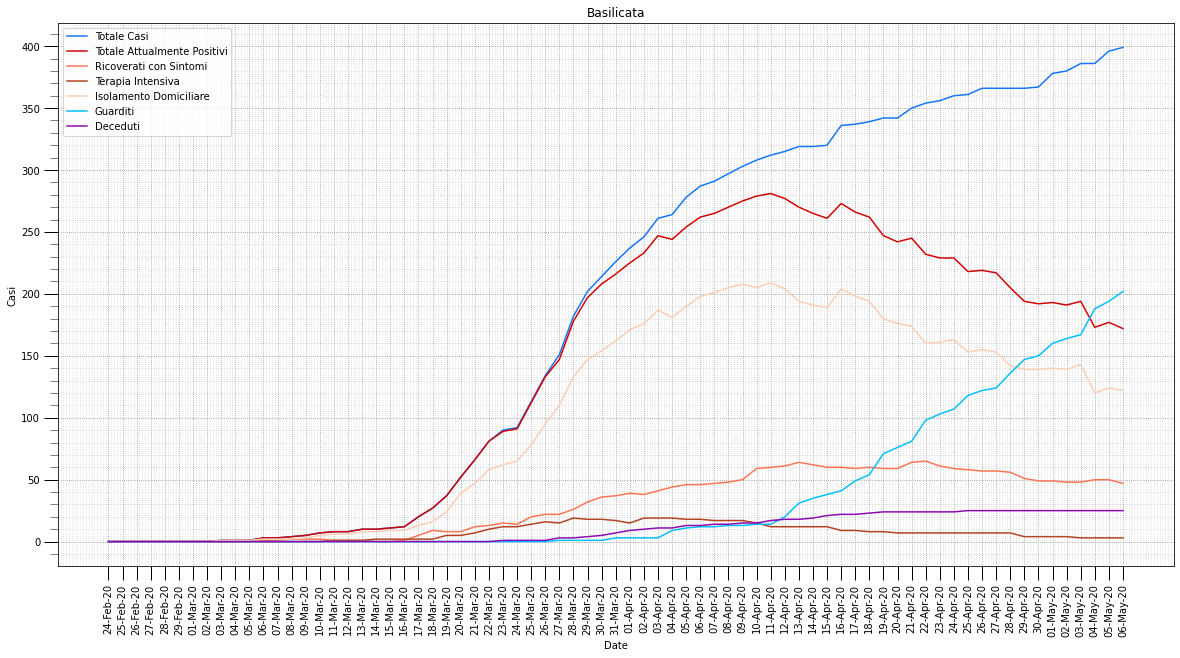

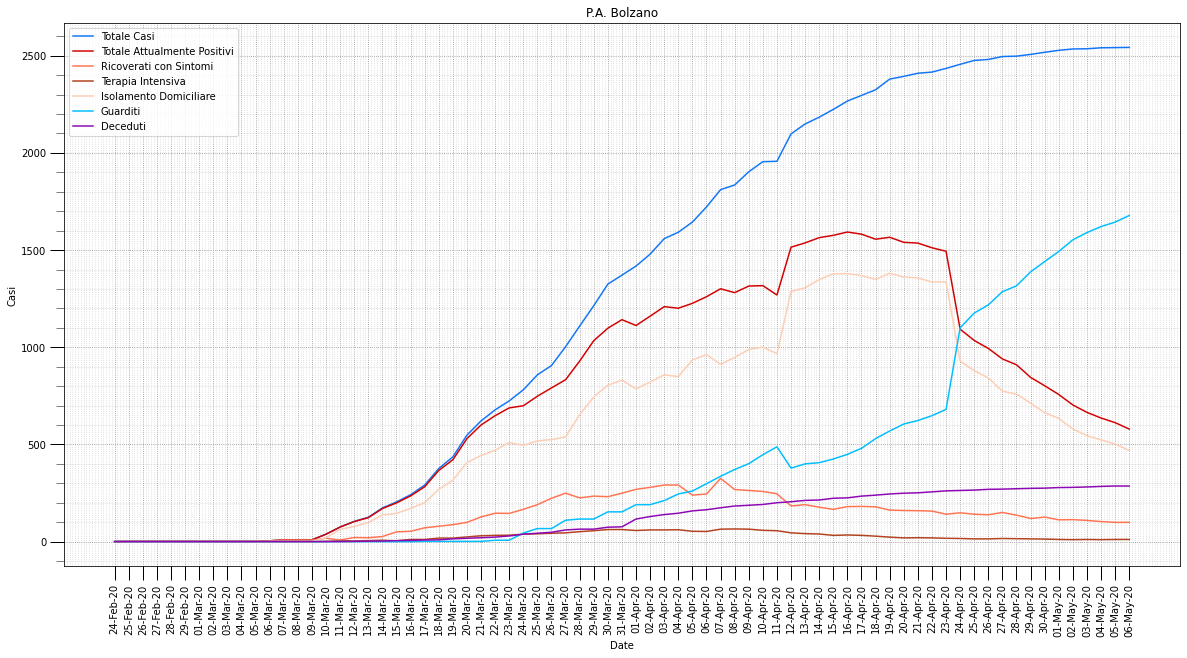

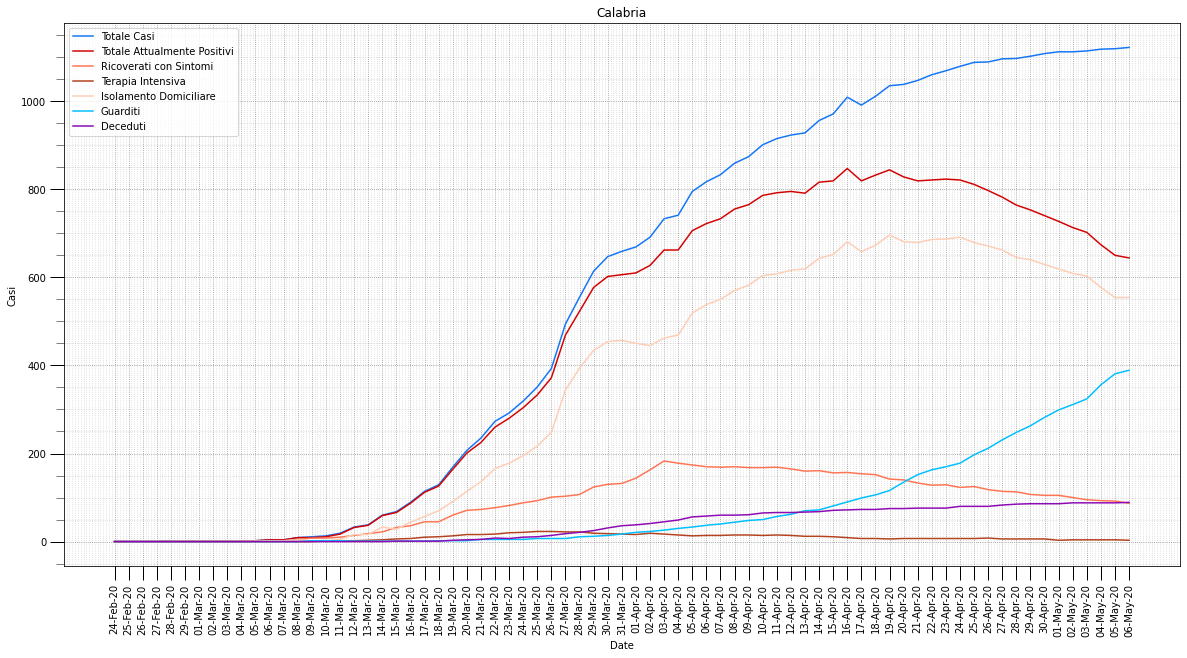

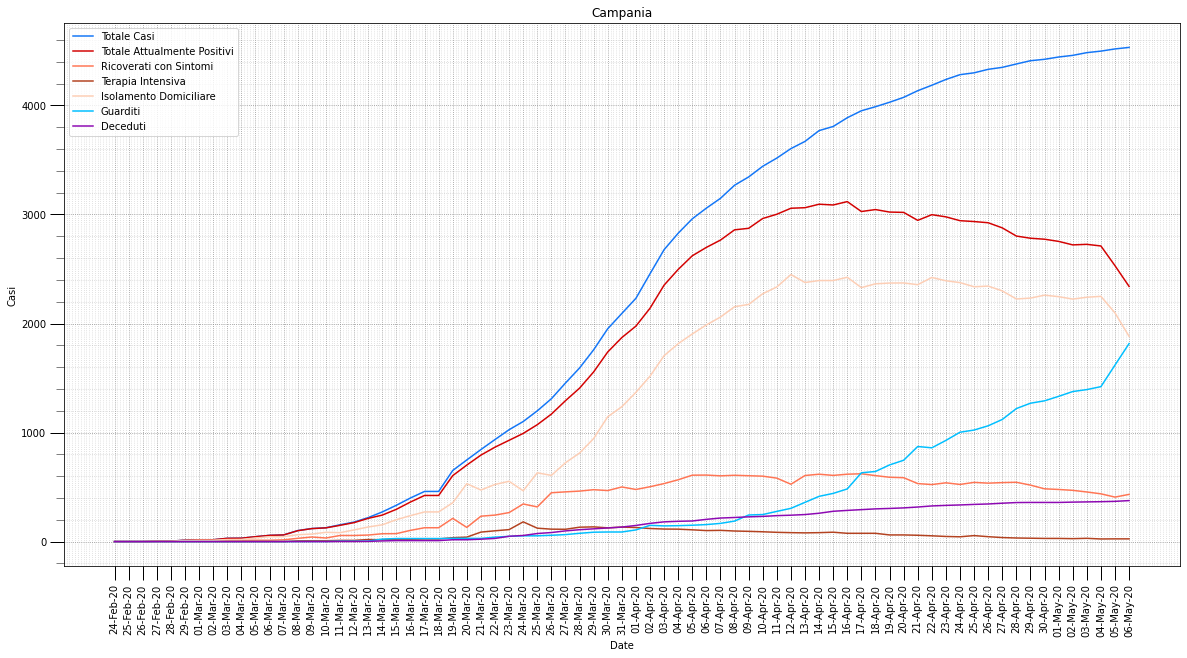

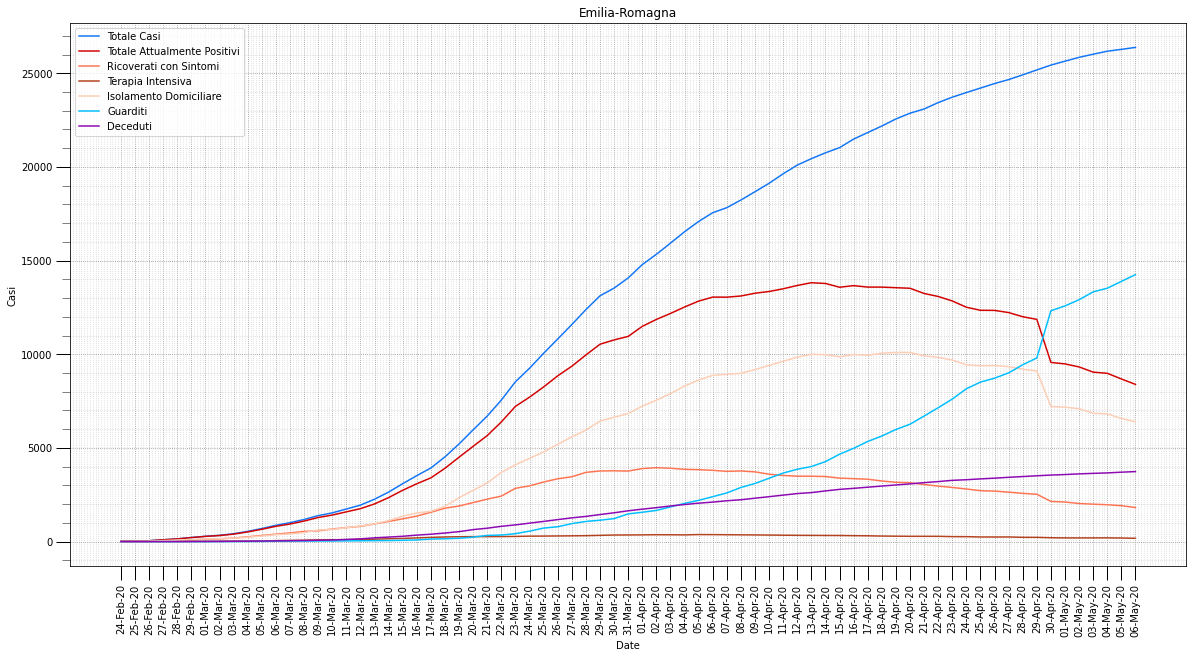

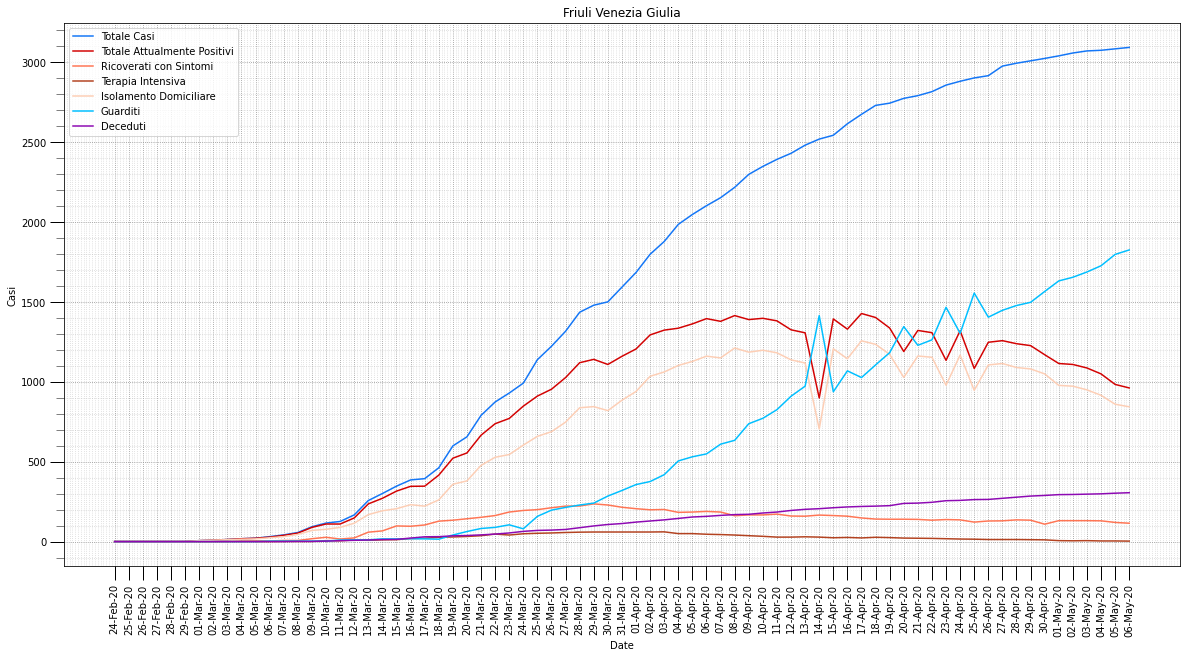

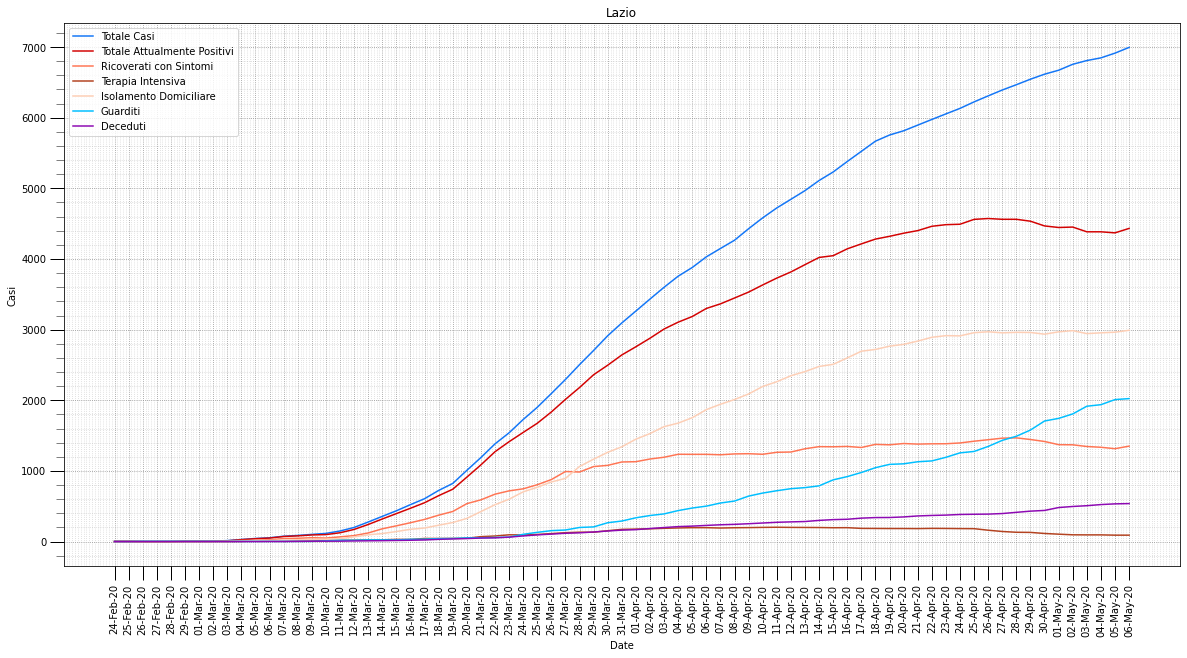

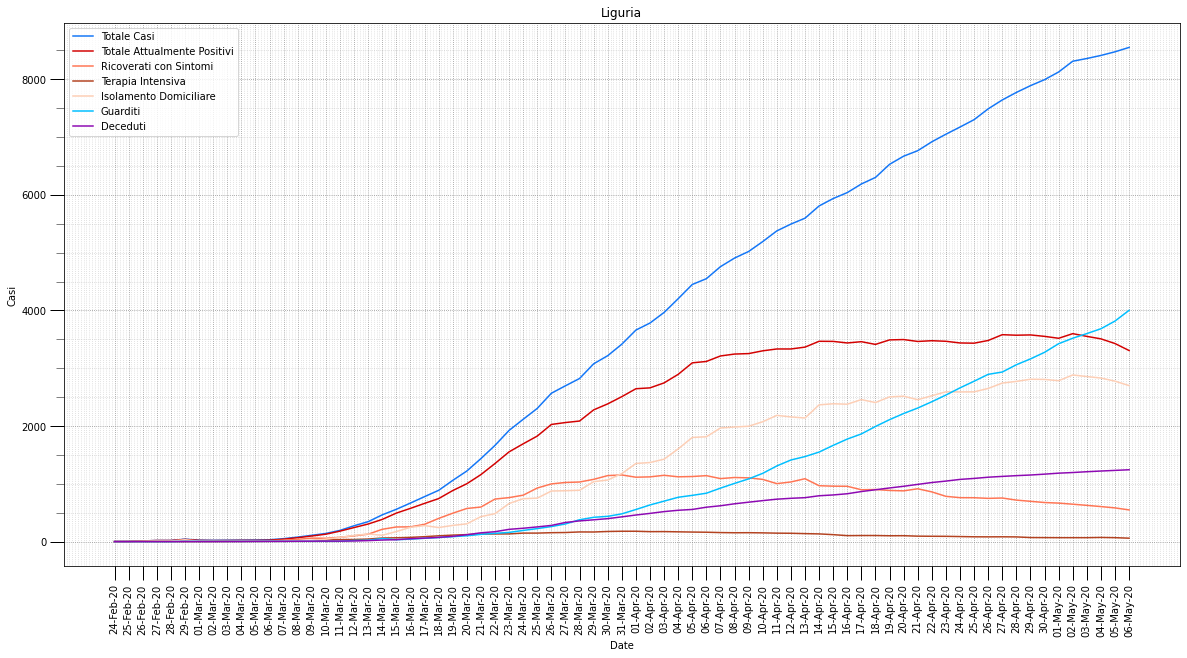

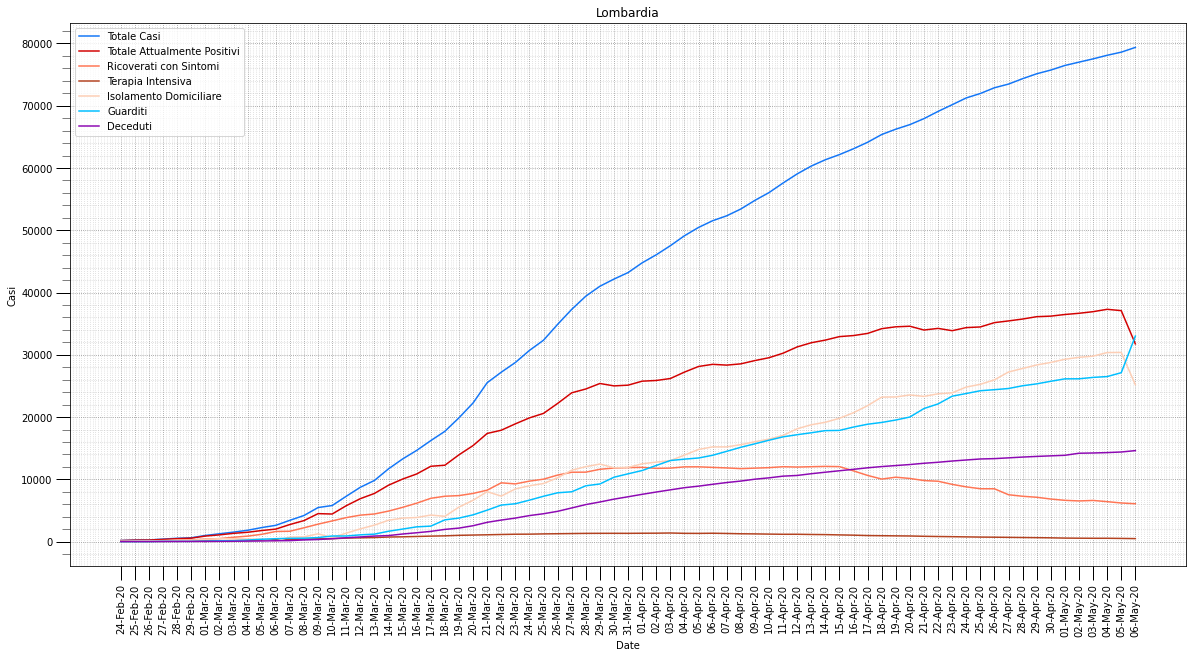

In [173]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[:10]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

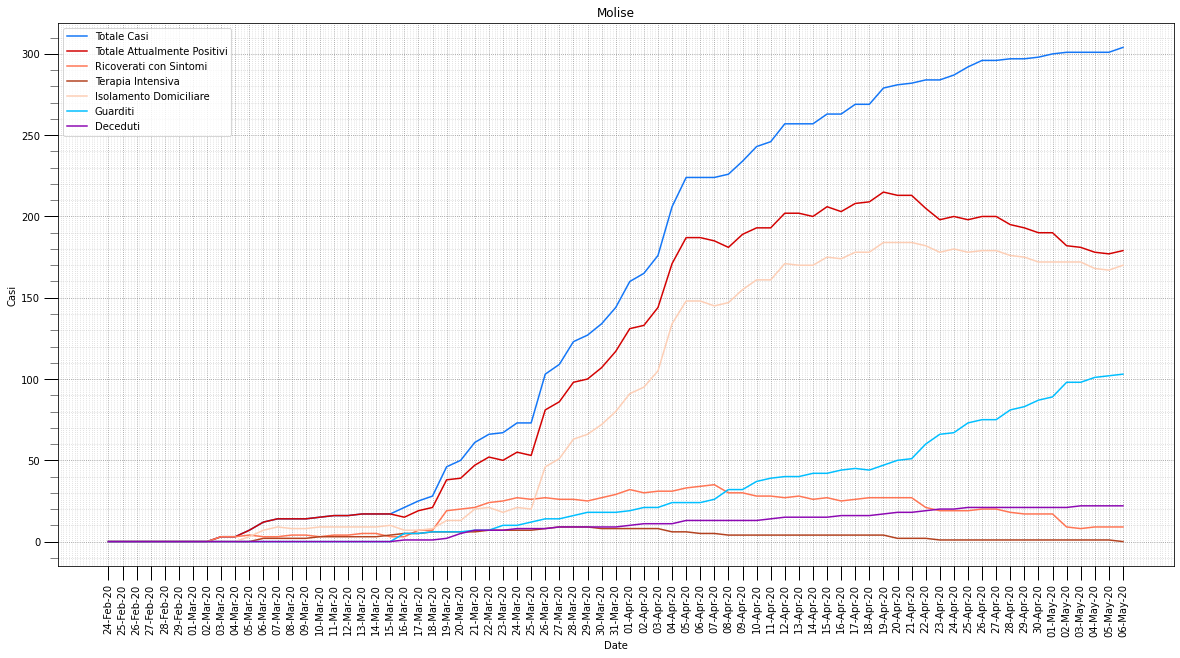

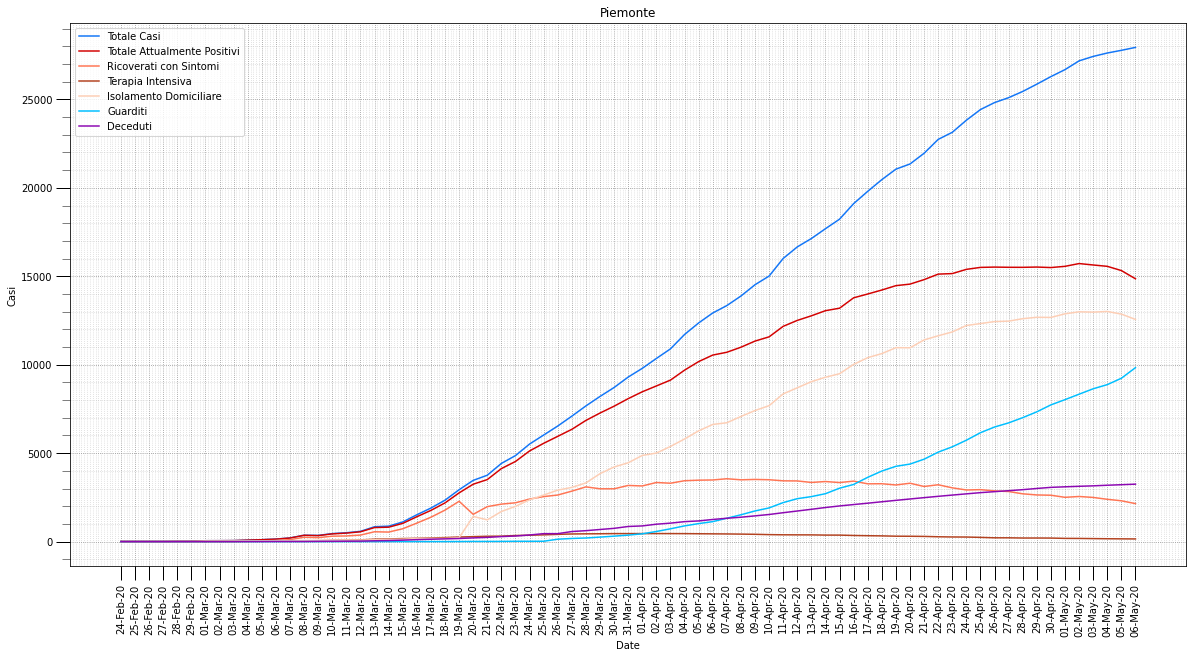

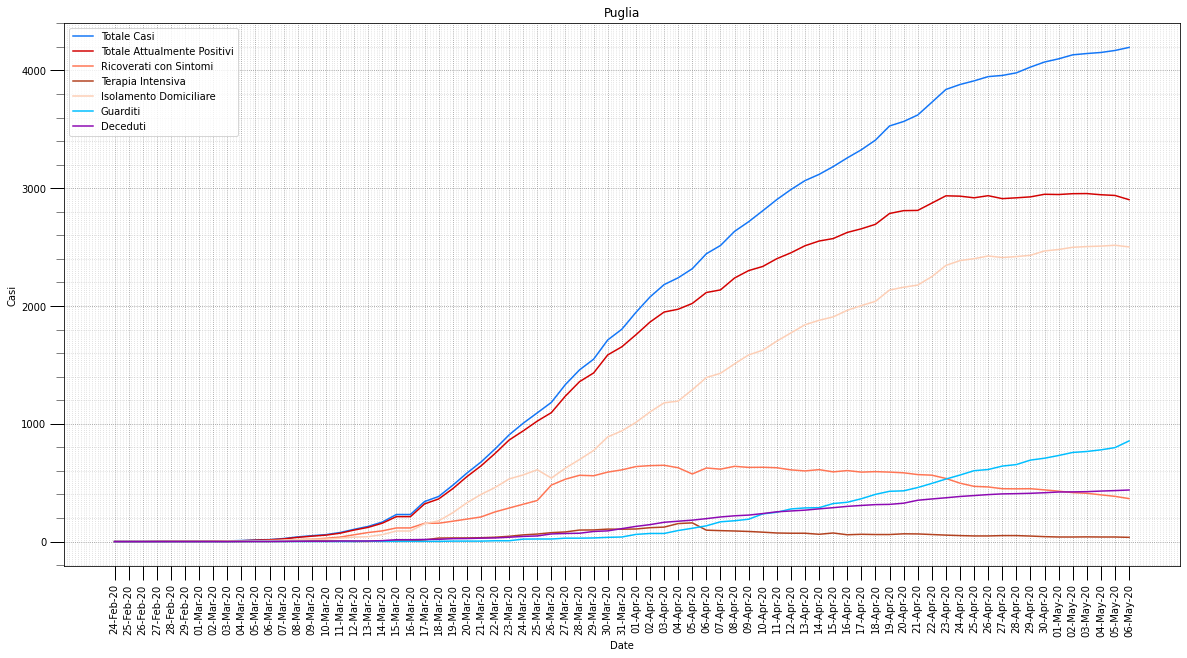

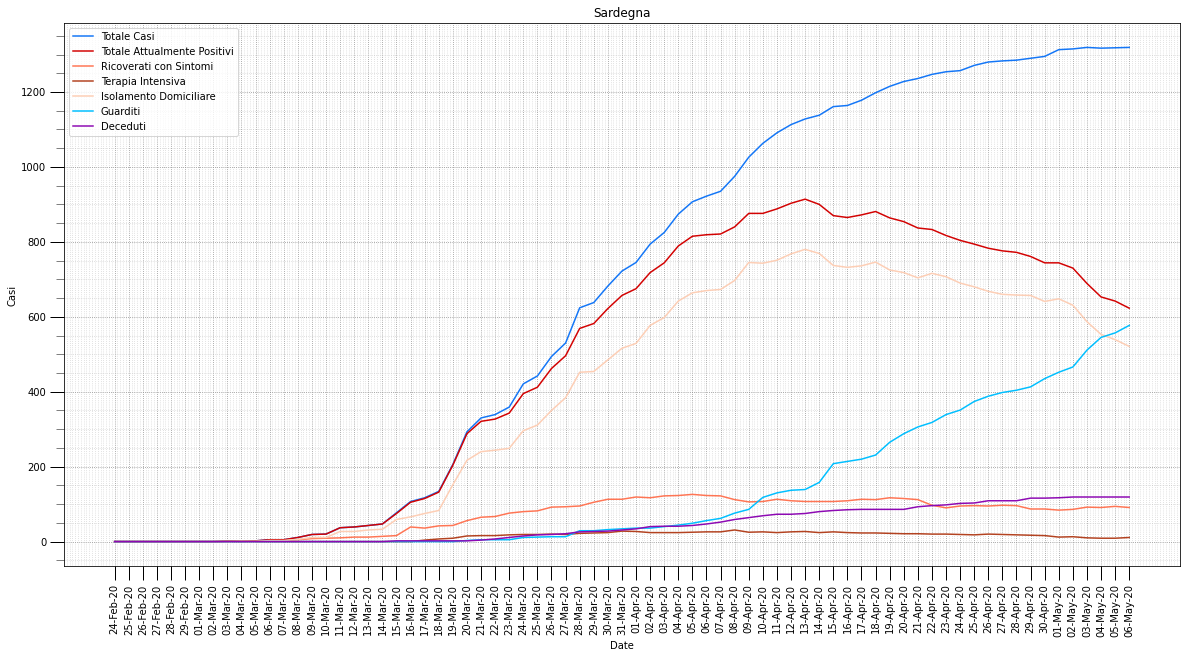

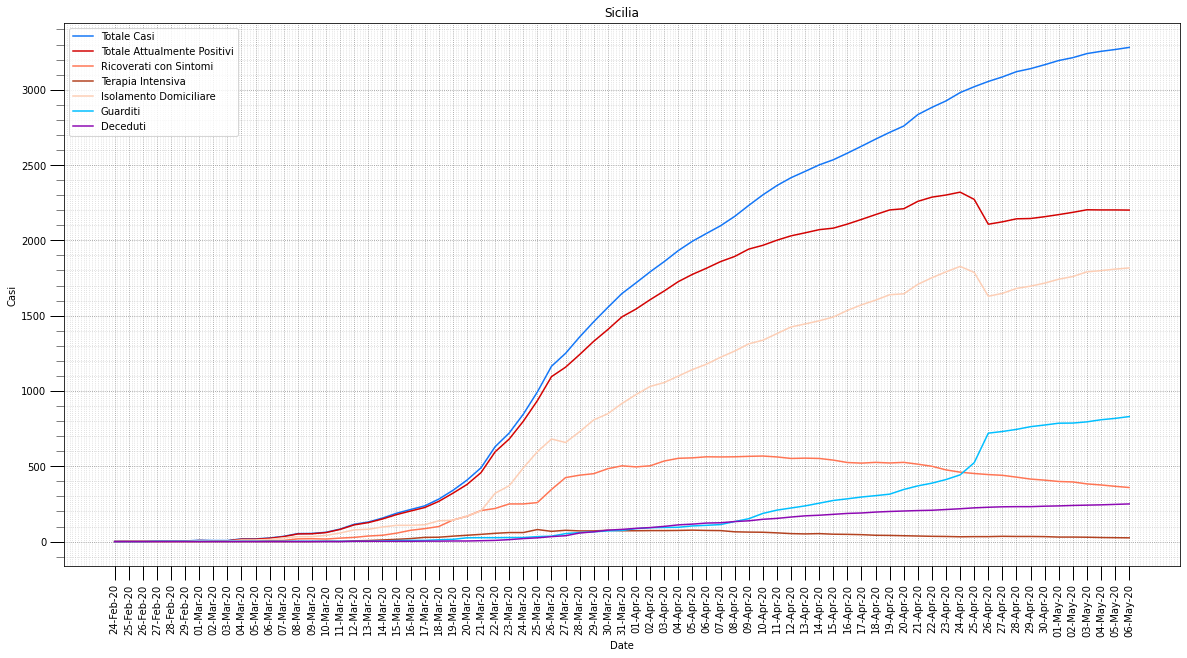

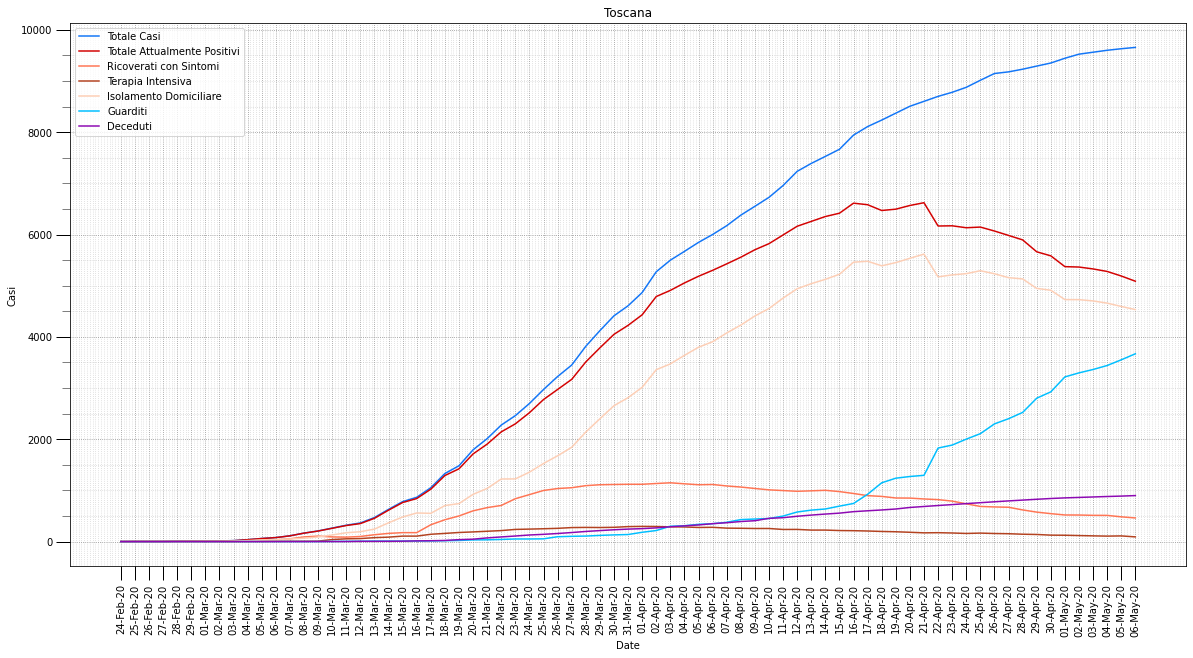

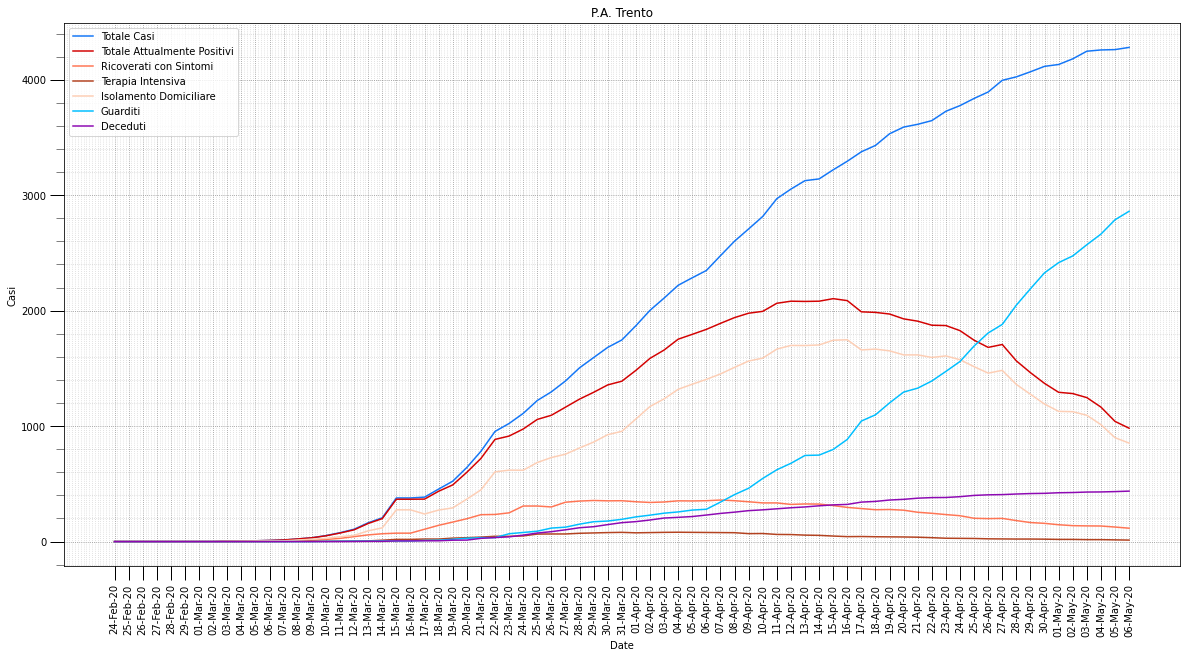

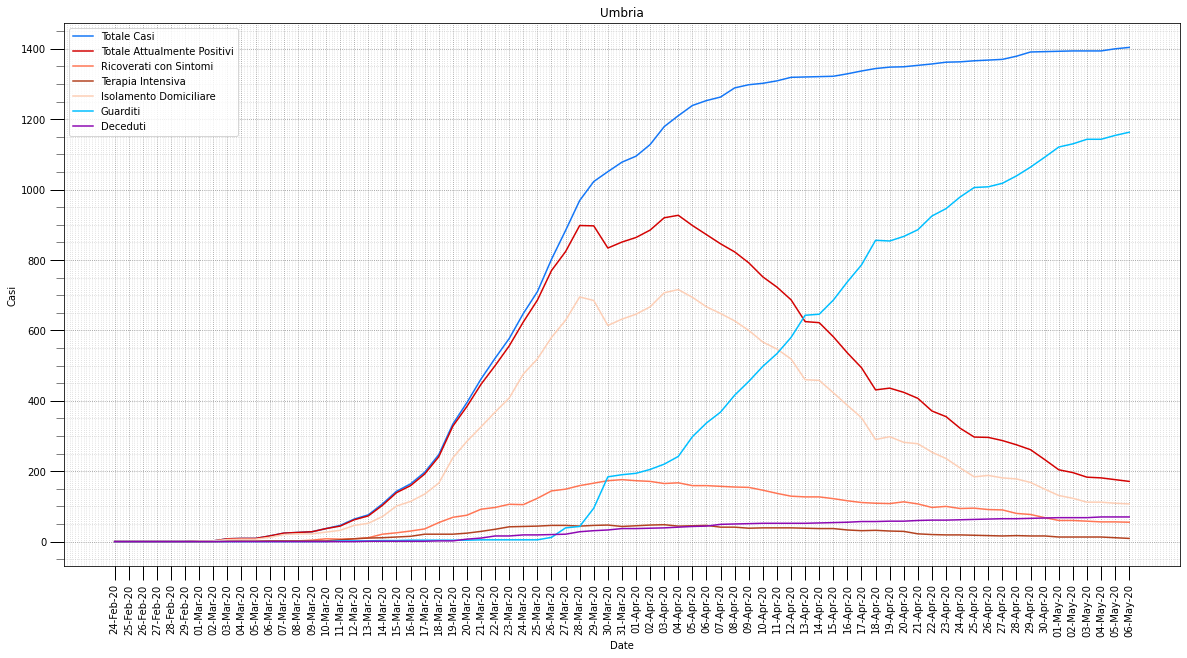

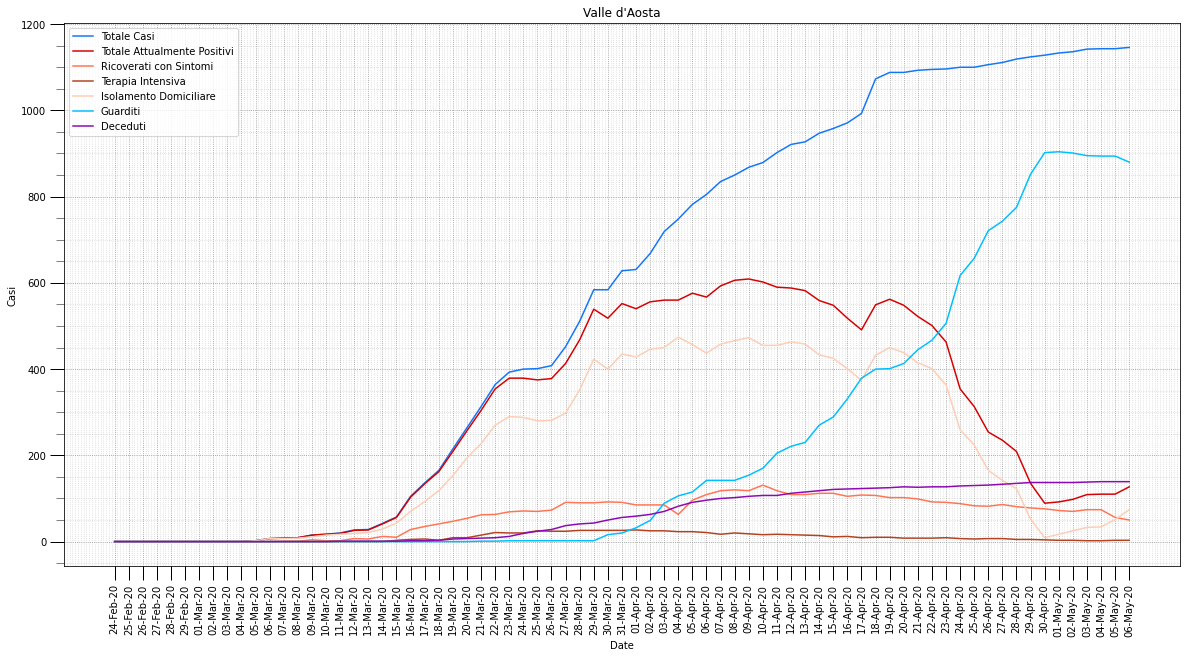

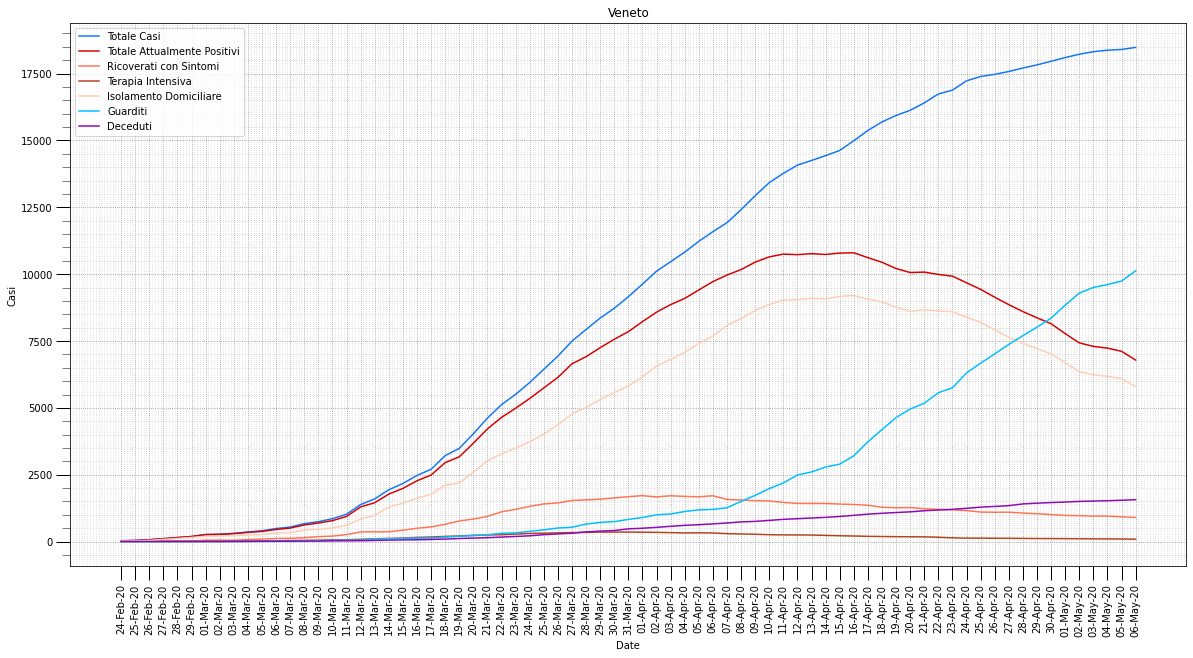

In [174]:

plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]
for i,r in enumerate(regions[11:]):
    fig, ax = plt.subplots()
    for j,p in enumerate(plot):
        plt.plot(regions_data[r].index, regions_data[r][p], color=colors[j], label=legends[j])
    ax.set_title(r)
    ax.set_ylabel('Casi')
    ax.set_xticklabels(regions_data[r].index, rotation=90)    
    beautify_graph(ax)

### Lombardia andamento quotidiano

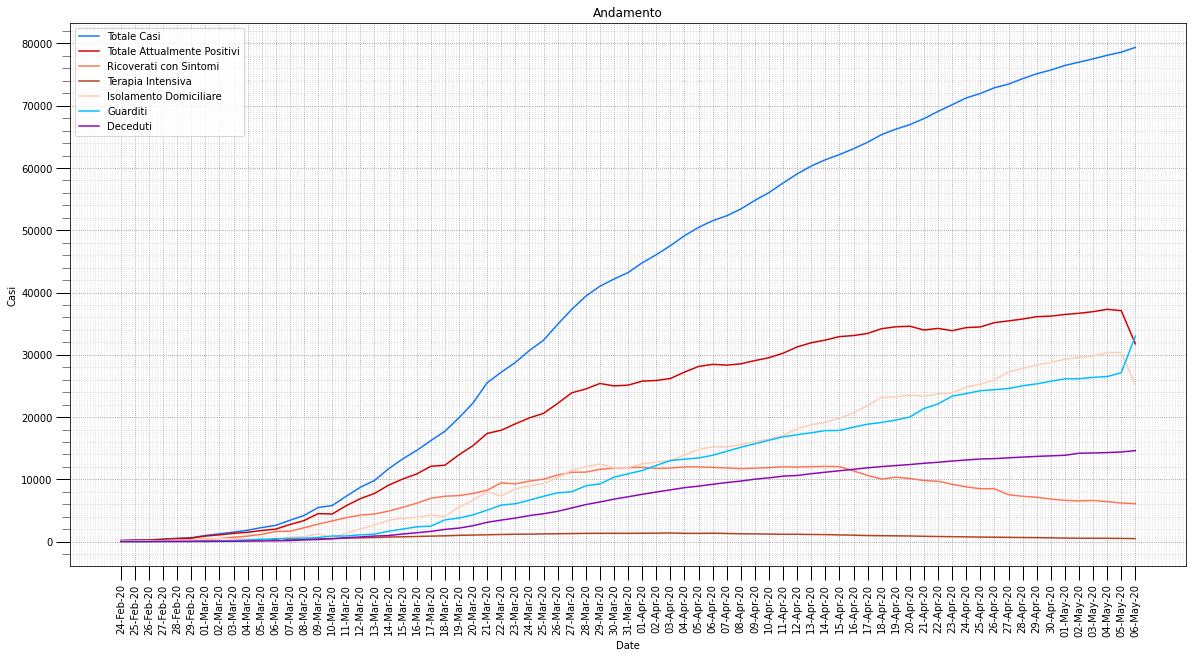

In [175]:
plot =['totale_casi','totale_attualmente_positivi','ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare','dimessi_guariti','deceduti']
colors = [COL_TOTALE_CASI, COL_ATTUALMENTE_POSITIVI, COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE, COL_GUARITI, COL_DECEDUTI]
legends = ["Totale Casi", "Totale Attualmente Positivi","Ricoverati con Sintomi","Terapia Intensiva","Isolamento Domiciliare","Guarditi", "Deceduti"]

fig, ax = plt.subplots()
for j,p in enumerate(plot):
    plt.plot(regions_data['Lombardia'].index, regions_data['Lombardia'][p], color=colors[j], label=legends[j])
ax.set_title('Andamento')
ax.set_ylabel('Casi')
ax.set_xticklabels(regions_data['Lombardia'].index, rotation=90)    
beautify_graph(ax)

In [176]:
lombardia = regions_data['Lombardia']

In [177]:
incremental_data = pd.DataFrame()
incremental_columns = ['totale_casi','nuovi_attualmente_positivi', 'dimessi_guariti', 'deceduti','totale_ospedalizzati',  'ricoverati_con_sintomi', 'terapia_intensiva',  'isolamento_domiciliare','tamponi']

for c in incremental_columns:
    if c in ['nuovi_attualmente_positivi','data']:
        incremental_data[c] = lombardia[c]
    else:
        incremental_data[c] = lombardia[c] - lombardia[c].shift(1)
        incremental_data[c] = incremental_data[c].astype(pd.Int64Dtype())
    
incremental_data

complete_incremental_data = incremental_data
incremental_data = incremental_data[1:]

### Casi totali giornalieri

In [178]:
show_table(incremental_data,15)

CASI TOTALI  DIFF. POSITIVI  GUARITI  DECEDUTI  TOT. RICOV.  \
data                                                                     
22-Apr-20         1161             264      736       161         -147   
23-Apr-20         1073            -369     1242       200         -527   
24-Apr-20         1091             495      430       166         -435   
25-Apr-20          713             105      445       163         -334   
26-Apr-20          920             693      171        56          -26   
27-Apr-20          590             275      191       124         -982   
28-Apr-20          869             303      440       126         -270   
29-Apr-20          786             378      304       104         -181   
30-Apr-20          598              89      416        93         -315   
01-May-20          737             262      387        88         -248   
02-May-20          533             194       10       329         -117   
03-May-20          526             259      225        42           67   
04-May-20          577             381      133        63         -195   
05-May-20          500            -215      620        95         -236   
06-May-20          764           -5339     5881       222         -151   

           RICOVERATI  TERAPIA INT.  ISOLAME. DOM.  TAMPONI  
data                                                         
22-Apr-20        -113           -34            411    13502  
23-Apr-20        -500           -27            158    12016  
24-Apr-20        -401           -34            930    11583  
25-Apr-20        -302           -32            439    12642  
26-Apr-20          -8           -18            719    10857  
27-Apr-20        -956           -26           1257     5053  
28-Apr-20        -245           -25            573     8573  
29-Apr-20        -160           -21            559    14472  
30-Apr-20        -286           -29            404    11048  
01-May-20        -206           -42            510    13701  
02-May-20         -99           -18            311    13058  
03-May-20          80           -13            192     7155  
04-May-20        -195             0            576     7978  
05-May-20        -213           -23             21     6455  
06-May-20        -122           -29          -5188    14516

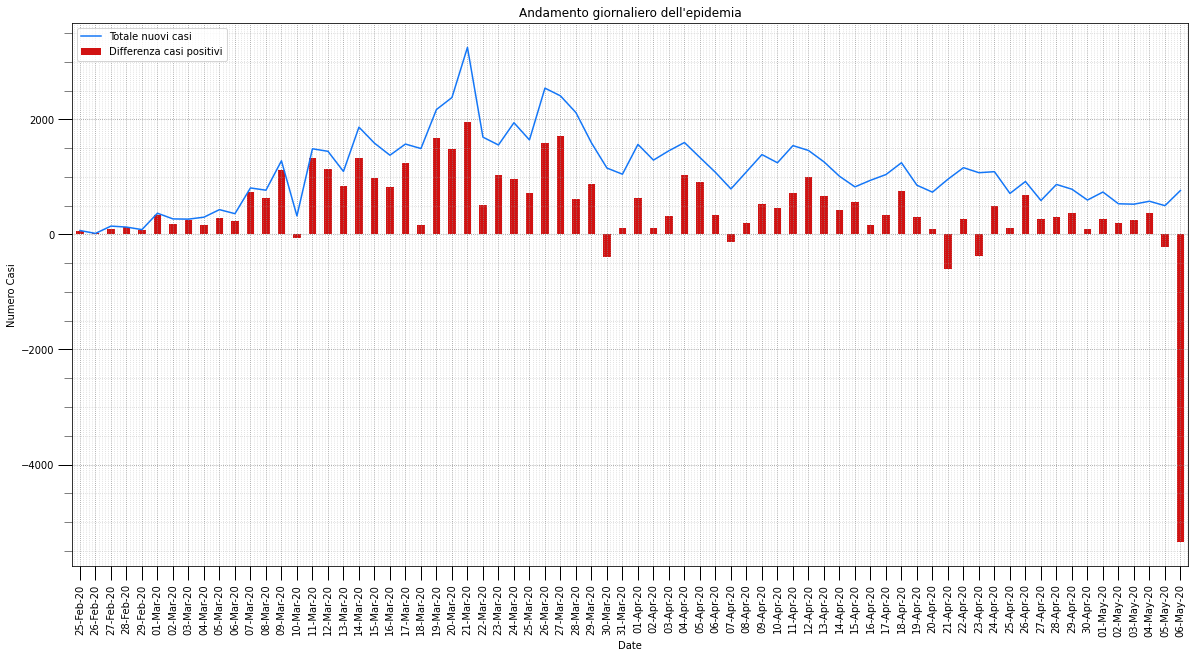

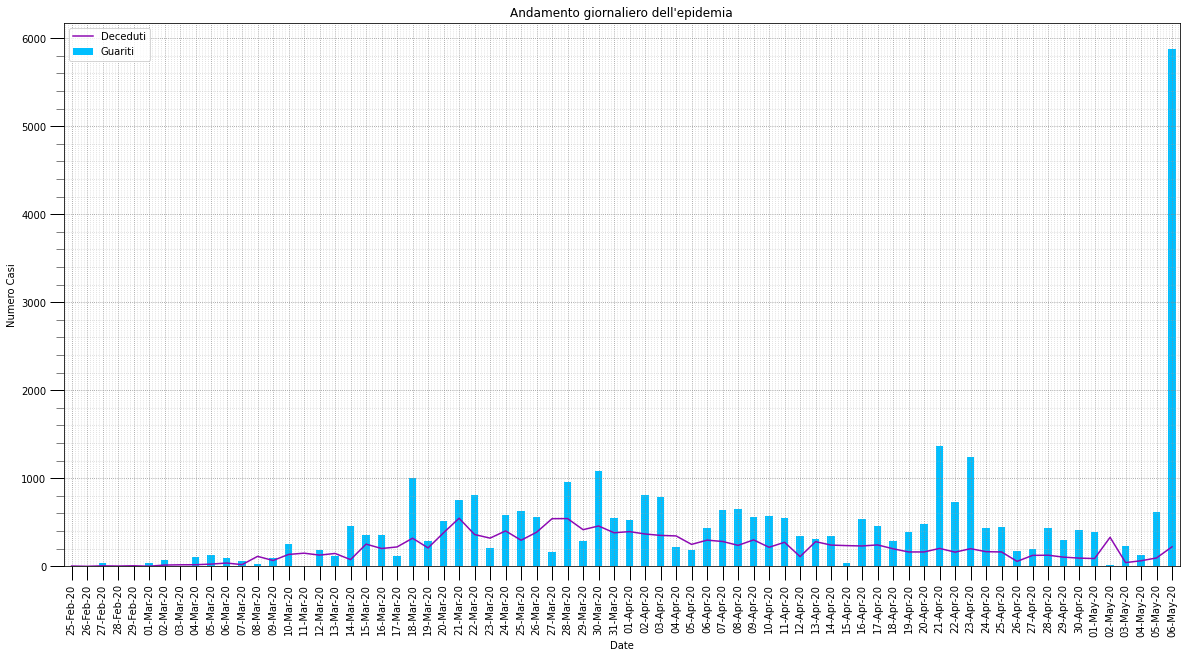

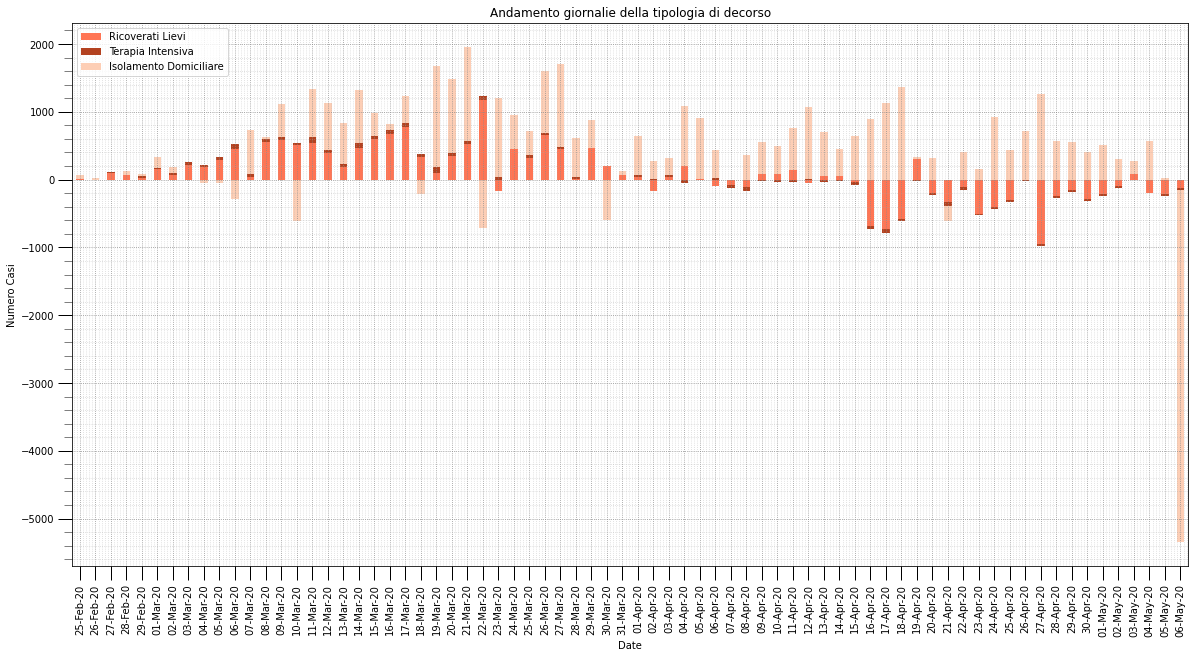

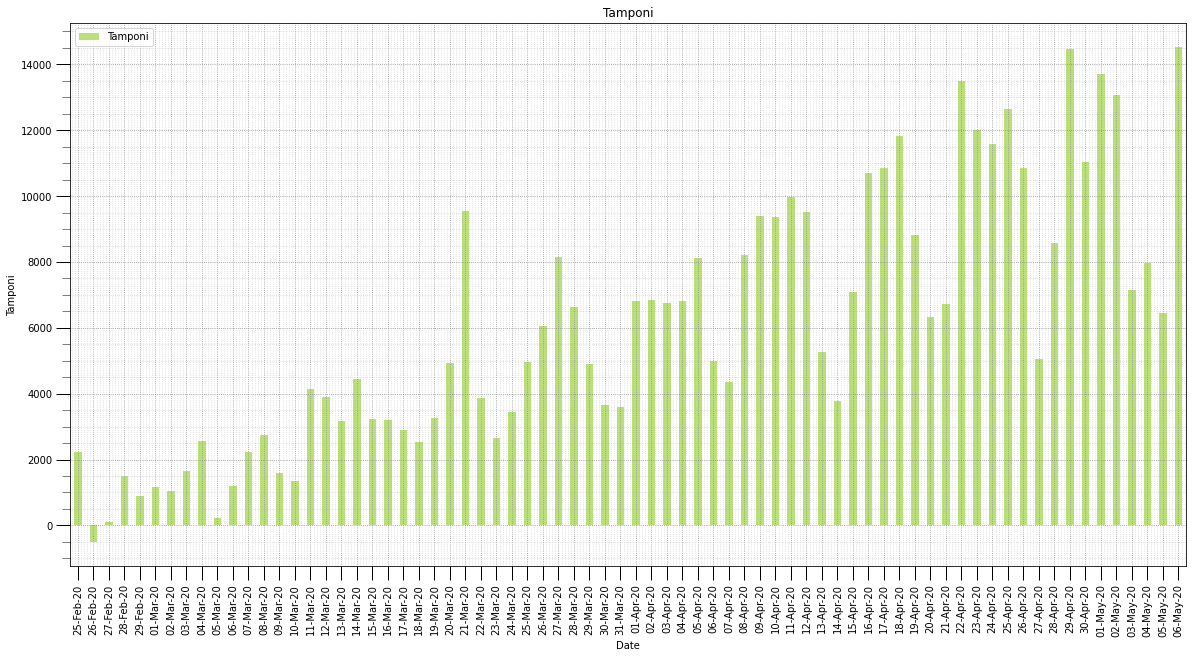

In [179]:
plot =['totale_casi']
legends = ["Totale nuovi casi"]
colors = [COL_TOTALE_CASI]
ax = incremental_data.plot(kind='line', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['nuovi_attualmente_positivi']
legends = ["Differenza casi positivi"]
colors = [COL_DIFF_POSITIVI]
ay = incremental_data.plot(kind='bar',  y=plot, color=colors, rot=90, label=legends,  ax=ax)
beautify_graph(ay)


plot =['deceduti']
legends = ["Deceduti"]
colors = [COL_DECEDUTI]
ax = incremental_data.plot(kind='line', y=plot, color=colors, rot=90, label=legends)
ax.set_ylabel('Numero Casi')
ax.set_title("Andamento giornaliero dell'epidemia")
beautify_graph(ax)

plot =['dimessi_guariti']
legends = ["Guariti"]
colors = [COL_GUARITI]
ay = incremental_data.plot(kind='bar',  y=plot, color=colors, rot=90, label=legends, ax=ax)
beautify_graph(ay)


plot =['ricoverati_con_sintomi', 'terapia_intensiva','isolamento_domiciliare',]
legends = ["Ricoverati Lievi","Terapia Intensiva","Isolamento Domiciliare"]
colors = [COL_RICOVERATI, COL_TERAPIA_INTENSIVA, COL_ISOLAMENTO_DOMICILIARE]
az = incremental_data.plot(kind='bar', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Andamento giornalie della tipologia di decorso")
az.set_ylabel('Numero Casi')
beautify_graph(az)

plot =['tamponi']
legends = ["Tamponi"]
colors = [COL_TAMPONI,]
az = incremental_data.plot(kind='bar', y=plot, color=colors, rot=90, stacked=True, label=legends)
az.set_title("Tamponi")
az.set_ylabel('Tamponi')
beautify_graph(az)